In [1]:
#vid_only refers to the participants\' ratings, whereas openface is the data X

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import re
from cleanavgcorr import ParticipantResults
import scipy.stats as st
import sklearn
from sklearn import linear_model
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/envs/nlu/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #1
	"backend=TkAgg"
	in file "/Users/MichaelSmith/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)
/anaconda3/envs/nlu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
## We are keeping animations for now... 

anim_directory = os.fsencode('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/new_animation_result/ratings')
#old_vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/VideoOnly')
vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/vidOnly')
worker_info = pd.read_csv('/Users/MichaelSmith/Desktop/Recent Desktop SSNL/new_animation_result/workers/worker_info_new.csv', sep=',')

face = {}
mouth = {}
eyes = {}
vid_only = {}

vid_only_csvs = {}

# FACE, EYES, MOUTH ANIMATION CONDITIONS
# for file in os.listdir(anim_directory):
#     filename = os.fsdecode(file)
#     if filename.endswith('.csv'):
#         vid_id = filename[:10]
#         df = pd.read_csv(os.path.join(os.fsdecode(anim_directory), filename))
#         if 'face' in filename:
#             pr = ParticipantResults(vid_id + '_anim_face', df, worker_info)
#             face[vid_id] = pr
#         elif 'eyes' in filename:
#             pr = ParticipantResults(vid_id + '_anim_eyes', df, worker_info)
#             eyes[vid_id] = pr
#         else:
#             pr = ParticipantResults(vid_id + '_anim_mouth', df, worker_info)
#             mouth[vid_id] = pr

#VIDEO ONLY CONDITION
for file in os.listdir(vid_only_dir):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(vid_only_dir), filename)).T
        pr = ParticipantResults(vid_id, df, worker_info)
        vid_only[vid_id] = pr
        vid_only_csvs[vid_id] = df


In [4]:
## cleaning and averaging

for key in vid_only:
    vid_only[key].clean(anim=False)
    vid_only[key].compute_average()

Num people thrown out for video ID128_vid2: 7 out of 24 participants
Num people thrown out for video ID129_vid2: 3 out of 17 participants
Num people thrown out for video ID117_vid3: 7 out of 24 participants
Num people thrown out for video ID116_vid3: 2 out of 23 participants
Num people thrown out for video ID123_vid1: 5 out of 20 participants
Num people thrown out for video ID161_vid3: 5 out of 23 participants
Num people thrown out for video ID154_vid1: 5 out of 17 participants
Num people thrown out for video ID116_vid2: 3 out of 12 participants
Num people thrown out for video ID117_vid2: 9 out of 25 participants
Num people thrown out for video ID129_vid3: 1 out of 16 participants
Num people thrown out for video ID143_vid5: 9 out of 36 participants
Num people thrown out for video ID129_vid1: 6 out of 19 participants
Num people thrown out for video ID123_vid2: 4 out of 32 participants
Num people thrown out for video ID149_vid6: 2 out of 17 participants
Num people thrown out for video ID

Num people thrown out for video ID181_vid3: 0 out of 17 participants
Num people thrown out for video ID180_vid3: 13 out of 51 participants
Num people thrown out for video ID165_vid2: 1 out of 23 participants
Num people thrown out for video ID113_vid3: 4 out of 21 participants
Num people thrown out for video ID112_vid3: 4 out of 16 participants
Num people thrown out for video ID112_vid2: 3 out of 15 participants
Num people thrown out for video ID113_vid2: 3 out of 18 participants
Num people thrown out for video ID179_vid6: 10 out of 22 participants
Num people thrown out for video ID178_vid6: 4 out of 15 participants
Num people thrown out for video ID164_vid3: 3 out of 19 participants
Num people thrown out for video ID165_vid3: 2 out of 17 participants
Num people thrown out for video ID180_vid2: 2 out of 18 participants
Num people thrown out for video ID181_vid2: 3 out of 18 participants
Num people thrown out for video ID172_vid5: 5 out of 20 participants
Num people thrown out for video 

In [5]:
for key in vid_only:
    print(key)

ID128_vid2
ID129_vid2
ID117_vid3
ID116_vid3
ID123_vid1
ID161_vid3
ID154_vid1
ID116_vid2
ID117_vid2
ID129_vid3
ID143_vid5
ID129_vid1
ID123_vid2
ID149_vid6
ID161_vid1
ID123_vid3
ID117_vid1
ID116_vid1
ID129_vid4
ID134_vid1
ID116_vid5
ID117_vid5
ID154_vid6
ID149_vid3
ID161_vid4
ID117_vid4
ID116_vid4
ID128_vid5
ID129_vid5
ID142_vid1
ID143_vid3
ID142_vid3
ID129_vid7
ID117_vid6
ID116_vid6
ID123_vid4
ID154_vid4
ID123_vid5
ID134_vid3
ID135_vid3
ID129_vid6
ID128_vid6
ID142_vid2
ID171_vid2
ID170_vid2
ID153_vid6
ID124_vid6
ID111_vid4
ID171_vid3
ID144_vid1
ID145_vid1
ID144_vid3
ID145_vid3
ID171_vid1
ID153_vid5
ID153_vid4
ID145_vid2
ID171_vid4
ID167_vid2
ID111_vid3
ID124_vid1
ID153_vid1
ID171_vid5
ID170_vid7
ID153_vid3
ID167_vid1
ID124_vid2
ID124_vid3
ID111_vid1
ID153_vid2
ID171_vid6
ID145_vid4
ID174_vid1
ID169_vid4
ID137_vid2
ID120_vid4
ID114_vid6
ID115_vid6
ID162_vid6
ID121_vid5
ID174_vid2
ID137_vid1
ID115_vid5
ID114_vid5
ID162_vid4
ID156_vid6
ID162_vid5
ID163_vid5
ID114_vid4
ID121_vid6
ID141_vid1

In [6]:
from sklearn.preprocessing import MinMaxScaler
def normalize_input(df_slice):
    minimum = df_slice.min().min()
    maximum = df_slice.max().max() - minimum
    minimum = 0
    normalizer = MinMaxScaler(feature_range=(minimum, maximum))
    return normalizer.fit_transform(df_slice)

In [7]:
xs = slice(' x_0',' x_67')
ys = slice(' y_0',' y_67')

Xs = slice(' X_0',' X_67')
Ys = slice(' Y_0',' Y_67')
Zs = slice(' Z_0',' Z_67')

eyexs = slice(' eye_lmk_x_0', ' eye_lmk_x_55')
eyeys = slice(' eye_lmk_y_0', ' eye_lmk_y_55')

eyeXs = slice(' eye_lmk_X_0', ' eye_lmk_X_55')
eyeYs = slice(' eye_lmk_Y_0', ' eye_lmk_Y_55')
eyeZs = slice(' eye_lmk_Z_0', ' eye_lmk_Z_55')

slices = [xs, ys, Xs, Ys, Zs, eyexs, eyeys, eyeXs, eyeYs, eyeZs]

In [8]:
# OPENFACE CSVs -- this is the old one
# this one can take a while..

# can keep this in expansion!
openface_dir = os.fsencode('/Users/MichaelSmith/Desktop/OpenFaceCSVs')

openface_dict = {}

for file in os.listdir(openface_dir):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(openface_dir), filename))
        openface_dict[vid_id] = df


In [9]:
# normalizes faces for the most part (might be a few parameters that don't end up normalized)
for key in openface_dict:
    for slic in slices:
        openface_dict[key].loc[:, slic] = normalize_input(openface_dict[key].loc[:, slic])

In [10]:
every_15_openface = {}
average_participant_ratings = {}

for key in openface_dict:
    average_participant_ratings[key] = vid_only[key].average_df.iloc[:-1].reset_index(drop=True)
    every_15_openface[key] = openface_dict[key].iloc[14::15, :].reset_index(drop=True)


In [11]:
# this one also takes a good amount of time to compute...

X = pd.DataFrame()
Y = pd.DataFrame()

copy = every_15_openface.copy()

# X_lstm_Train = pd.DataFrame()
# Y_lstm_Train = pd.DataFrame()
# X_lstm_Test = pd.DataFrame()
# Y_lstm_Test = pd.DataFrame()

index_num = 0

for key in every_15_openface:
    total_rows_to_consider = min(average_participant_ratings[key].shape[0], every_15_openface[key].shape[0])
    every_15_openface[key] = every_15_openface[key].iloc[:total_rows_to_consider, :]
    average_participant_ratings[key] = average_participant_ratings[key].iloc[:total_rows_to_consider]
    every_15_openface[key]['face_id'] = index_num
    index_num += 1
    # next part only for Linear Regression...
    X = pd.concat([X, every_15_openface[key]])
    Y = pd.concat([Y, average_participant_ratings[key]])
    
    # this was one way to split, I want to consider another.
#     train_rows = int(total_rows_to_consider/3*2)
#     X_lstm_Train = pd.concat([X_lstm_Train, every_15_openface[key].iloc[:train_rows, :]])
#     Y_lstm_Train = pd.concat([Y_lstm_Train, average_participant_ratings[key].iloc[:train_rows]])
#     X_lstm_Test = pd.concat([X_lstm_Test, every_15_openface[key].iloc[train_rows:, :]])
#     Y_lstm_Test = pd.concat([Y_lstm_Test, average_participant_ratings[key].iloc[train_rows:]])

    

/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def create_split(dictionary):
    num_train = 115
    num_val = 25
    
    train = {}
    dev = {}
    test = {}
    count = 0
    
    
    
    for key in dictionary:
        if count < num_train:
            train[key] = dictionary[key]
        elif count < num_train + num_val:
            dev[key] = dictionary[key]
        else:
            test[key] = dictionary[key]
            
        count += 1
            
    return train, dev, test
    

In [13]:
train, dev, test = create_split(every_15_openface)

In [14]:
#X.shape, Y.shape, X_lstm_Train.shape, X_lstm_Test.shape, Y_lstm_Train.shape, Y_lstm_Test.shape

### Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

X_train, X_test, y_train, y_test = train_test_split(X, Y)

# Linear Regression has a RMSE of ~8 

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
math.sqrt(mean_squared_error(y_test, pred))
#math.sqrt(mean_squared_error(y_train, pred))

6.119844946503922

In [1]:
for key in openface_dict:
    print(key)

NameError: name 'openface_dict' is not defined

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_train, y_train)

mask = selector.get_support()
new_features = X_train.columns[mask]
print(new_features)

/anaconda3/envs/nlu/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/nlu/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [1] are constant.
  UserWarning)
/anaconda3/envs/nlu/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index([' eye_lmk_Y_31', ' eye_lmk_Y_32', ' eye_lmk_Y_33', ' eye_lmk_Y_34',
       ' eye_lmk_Y_35', ' eye_lmk_Y_36', ' eye_lmk_Y_39', ' eye_lmk_Y_40',
       ' eye_lmk_Y_41', ' eye_lmk_Y_42', ' eye_lmk_Y_43', ' eye_lmk_Y_44',
       ' eye_lmk_Y_45', ' eye_lmk_Y_46', ' eye_lmk_Y_47', ' eye_lmk_Y_48',
       ' eye_lmk_Y_49', ' eye_lmk_Y_50', ' eye_lmk_Y_51', ' eye_lmk_Y_52'],
      dtype='object')


### Converting into separate tasks

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler2 = MinMaxScaler()
scalerY = MinMaxScaler()

pca = PCA(n_components=25)



scaled = pca.fit_transform(X) #pd.concat([X_lstm_Train, X_lstm_Test])
#Ys = pd.concat([Y_lstm_Train, Y_lstm_Test])
#scaled = pd.concat([Xs, Ys], axis=1)

scalerY.fit(Y.values.astype('float32'))


scaled = scaled.astype('float32')
scaler2.fit(scaled)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [73]:
print(openface_dict['ID114_vid1'].drop([' timestamp', 'frame'], axis=1))

       face_id   confidence   success   gaze_0_x   gaze_0_y   gaze_0_z  \
0            0         0.98         1   0.086861   0.327829  -0.940735   
1            0         0.98         1  -0.011358   0.393762  -0.919142   
2            0         0.98         1  -0.008135   0.401942  -0.915629   
3            0         0.98         1   0.097847   0.334181  -0.937416   
4            0         0.98         1   0.106341   0.304705  -0.946492   
5            0         0.98         1   0.138353   0.302132  -0.943173   
6            0         0.98         1   0.152166   0.288185  -0.945407   
7            0         0.98         1   0.148022   0.280718  -0.948307   
8            0         0.98         1   0.137576   0.276594  -0.951088   
9            0         0.98         1   0.131418   0.266784  -0.954754   
10           0         0.98         1   0.130316   0.267623  -0.954670   
11           0         0.98         1   0.126519   0.260762  -0.957077   
12           0         0.98         1 

In [34]:
correspondingYs = {}

for key in every_15_openface:
    #every_15_openface[key] = scaler2.transform(pca.transform(every_15_openface[key]))
    correspondingYs[key] = scalerY.transform(average_participant_ratings[key].values.reshape(average_participant_ratings[key].shape[0], 1))
    
    

(224, 25)
(336, 25)
(249, 25)
(198, 25)
(328, 25)
(267, 25)
(68, 25)
(229, 25)
(244, 25)
(364, 25)
(222, 25)
(398, 25)
(349, 25)
(352, 25)
(361, 25)
(352, 25)
(243, 25)
(314, 25)
(224, 25)
(350, 25)
(187, 25)
(254, 25)
(95, 25)
(275, 25)
(353, 25)
(321, 25)
(163, 25)
(345, 25)
(158, 25)
(136, 25)
(185, 25)
(102, 25)
(300, 25)
(234, 25)
(243, 25)
(363, 25)
(69, 25)
(351, 25)
(354, 25)
(305, 25)
(313, 25)
(324, 25)
(120, 25)
(357, 25)
(93, 25)
(202, 25)
(192, 25)
(313, 25)
(318, 25)
(355, 25)
(361, 25)
(265, 25)
(255, 25)
(251, 25)
(238, 25)
(224, 25)
(346, 25)
(227, 25)
(199, 25)
(109, 25)
(333, 25)
(138, 25)
(125, 25)
(191, 25)
(193, 25)
(340, 25)
(132, 25)
(371, 25)
(385, 25)
(174, 25)
(205, 25)
(364, 25)
(284, 25)
(364, 25)
(387, 25)
(289, 25)
(154, 25)
(182, 25)
(372, 25)
(225, 25)
(394, 25)
(308, 25)
(378, 25)
(294, 25)
(355, 25)
(366, 25)
(174, 25)
(120, 25)
(230, 25)
(343, 25)
(339, 25)
(347, 25)
(338, 25)
(317, 25)
(278, 25)
(386, 25)
(371, 25)
(372, 25)
(238, 25)
(342, 25)
(329

In [35]:
train, dev, test = create_split(every_15_openface)

### LSTM and other Models

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, Flatten, SimpleRNN, Conv2D, Dropout
import random

In [59]:
model = Sequential()

num_features = 25


numNeurons = 128
layer = LSTM(numNeurons, input_shape=(None, num_features)) # make this more 
# model.add(Dense(4, input_shape=(None,num_features), activation='tanh'))
#layer = GRU(numNeurons, return_sequences=False, input_shape=(None, num_features))
# model.add(Flatten())

#layer = SimpleRNN(numNeurons, input_shape=(None, num_features))
model.add(layer)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


def train_generator():
    while True:
        key = random.choice(list(train.keys())) # get random batch
        X_shape = train[key].shape
        x_train = train[key].reshape((X_shape[0], 1, X_shape[1]))
        y_train = correspondingYs[key]
        yield x_train, y_train
        
def val_generator():
    while True:
        key = random.choice(list(dev.keys())) # get random batch
        X_shape = dev[key].shape
        x_dev = dev[key].reshape((X_shape[0], 1, X_shape[1]))
        y_dev = correspondingYs[key]
        yield x_dev, y_dev
        
history = model.fit_generator(train_generator(), steps_per_epoch=1, epochs=15000, validation_data=val_generator(), validation_steps=len(dev)/5)


Epoch 1/15000
1/1 [==============================] - 1s 881ms/step - loss: 0.1340 - val_loss: 0.2103
Epoch 2/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1486 - val_loss: 0.1084
Epoch 3/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1141 - val_loss: 0.0543
Epoch 4/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0196 - val_loss: 0.0203
Epoch 5/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0293 - val_loss: 0.0293
Epoch 6/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0553 - val_loss: 0.0596
Epoch 7/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1416 - val_loss: 0.0781
Epoch 8/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0922
Epoch 9/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0683 - val_loss: 0.1527
Epoch 10/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0574 - val_loss: 0.100

Epoch 83/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0803 - val_loss: 0.0298
Epoch 84/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0262 - val_loss: 0.0700
Epoch 85/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0389 - val_loss: 0.0317
Epoch 86/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0843 - val_loss: 0.0642
Epoch 87/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0682 - val_loss: 0.0922
Epoch 88/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0286 - val_loss: 0.1083
Epoch 89/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0689 - val_loss: 0.0739
Epoch 90/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1923 - val_loss: 0.0381
Epoch 91/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0203 - val_loss: 0.0562
Epoch 92/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0300 - val_los

Epoch 164/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0116 - val_loss: 0.0548
Epoch 165/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0517 - val_loss: 0.0473
Epoch 166/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0355 - val_loss: 0.0381
Epoch 167/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0279 - val_loss: 0.0351
Epoch 168/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0166 - val_loss: 0.0446
Epoch 169/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0661 - val_loss: 0.0307
Epoch 170/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0936 - val_loss: 0.0439
Epoch 171/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0331 - val_loss: 0.0404
Epoch 172/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0184 - val_loss: 0.1120
Epoch 173/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0858

Epoch 245/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0669 - val_loss: 0.0137
Epoch 246/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0100 - val_loss: 0.0527
Epoch 247/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0457 - val_loss: 0.0418
Epoch 248/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0188 - val_loss: 0.0406
Epoch 249/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0311 - val_loss: 0.0298
Epoch 250/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0290 - val_loss: 0.0266
Epoch 251/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1246 - val_loss: 0.0321
Epoch 252/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0491 - val_loss: 0.0433
Epoch 253/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0315 - val_loss: 0.0181
Epoch 254/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0315

Epoch 326/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0255 - val_loss: 0.0322
Epoch 327/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0551 - val_loss: 0.0248
Epoch 328/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0116 - val_loss: 0.0197
Epoch 329/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0555 - val_loss: 0.0184
Epoch 330/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0098 - val_loss: 0.0569
Epoch 331/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0140 - val_loss: 0.0372
Epoch 332/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0557 - val_loss: 0.0330
Epoch 333/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0354
Epoch 334/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0221 - val_loss: 0.0332
Epoch 335/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0243

Epoch 407/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0323
Epoch 408/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0192 - val_loss: 0.0541
Epoch 409/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0194 - val_loss: 0.0643
Epoch 410/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0120 - val_loss: 0.0681
Epoch 411/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0872
Epoch 412/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0080 - val_loss: 0.0415
Epoch 413/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0975 - val_loss: 0.0314
Epoch 414/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0351 - val_loss: 0.0426
Epoch 415/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0181 - val_loss: 0.0759
Epoch 416/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0827

Epoch 488/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0085 - val_loss: 0.0307
Epoch 489/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0236
Epoch 490/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0224 - val_loss: 0.0134
Epoch 491/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0473 - val_loss: 0.0397
Epoch 492/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0195 - val_loss: 0.0065
Epoch 493/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0076 - val_loss: 0.0322
Epoch 494/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0055 - val_loss: 0.0537
Epoch 495/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0321 - val_loss: 0.0243
Epoch 496/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0136 - val_loss: 0.0394
Epoch 497/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0400

Epoch 569/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1690 - val_loss: 0.0855
Epoch 570/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0464 - val_loss: 0.0303
Epoch 571/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0315 - val_loss: 0.0092
Epoch 572/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0337 - val_loss: 0.0295
Epoch 573/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0707 - val_loss: 0.0388
Epoch 574/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0084 - val_loss: 0.0229
Epoch 575/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0224 - val_loss: 0.0283
Epoch 576/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0374 - val_loss: 0.0256
Epoch 577/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0651 - val_loss: 0.0282
Epoch 578/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0610

Epoch 650/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0571 - val_loss: 0.0263
Epoch 651/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0198 - val_loss: 0.0150
Epoch 652/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0632 - val_loss: 0.0379
Epoch 653/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0150 - val_loss: 0.0292
Epoch 654/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1861 - val_loss: 0.0331
Epoch 655/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0170 - val_loss: 0.0314
Epoch 656/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0155 - val_loss: 0.0408
Epoch 657/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0697 - val_loss: 0.0196
Epoch 658/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0167 - val_loss: 0.0060
Epoch 659/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0882

Epoch 731/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0200 - val_loss: 0.0237
Epoch 732/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0059 - val_loss: 0.0563
Epoch 733/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0183 - val_loss: 0.0448
Epoch 734/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0678 - val_loss: 0.0243
Epoch 735/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0125 - val_loss: 0.0243
Epoch 736/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0277 - val_loss: 0.0282
Epoch 737/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0739 - val_loss: 0.0402
Epoch 738/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0443
Epoch 739/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0136 - val_loss: 0.0216
Epoch 740/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0079

Epoch 812/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0291
Epoch 813/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0242 - val_loss: 0.0493
Epoch 814/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0190 - val_loss: 0.0216
Epoch 815/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0517 - val_loss: 0.0164
Epoch 816/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0208 - val_loss: 0.0214
Epoch 817/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1195 - val_loss: 0.0517
Epoch 818/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0077 - val_loss: 0.0334
Epoch 819/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0037 - val_loss: 0.0531
Epoch 820/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0216 - val_loss: 0.0568
Epoch 821/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0345

Epoch 893/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0068 - val_loss: 0.0354
Epoch 894/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0305 - val_loss: 0.0168
Epoch 895/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0248 - val_loss: 0.0094
Epoch 896/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0549 - val_loss: 0.0419
Epoch 897/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0441 - val_loss: 0.0361
Epoch 898/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - val_loss: 0.0316
Epoch 899/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0103 - val_loss: 0.0528
Epoch 900/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0175 - val_loss: 0.0276
Epoch 901/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0083 - val_loss: 0.0437
Epoch 902/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1113

Epoch 974/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0080 - val_loss: 0.0180
Epoch 975/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0039 - val_loss: 0.0245
Epoch 976/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0188 - val_loss: 0.0245
Epoch 977/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0084 - val_loss: 0.0271
Epoch 978/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0544
Epoch 979/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0128 - val_loss: 0.0496
Epoch 980/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0496 - val_loss: 0.0311
Epoch 981/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0651 - val_loss: 0.0412
Epoch 982/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0167 - val_loss: 0.0782
Epoch 983/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0315

Epoch 1054/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0081 - val_loss: 0.0407
Epoch 1055/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1208 - val_loss: 0.0282
Epoch 1056/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0113 - val_loss: 0.0163
Epoch 1057/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0138
Epoch 1058/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0395 - val_loss: 0.0514
Epoch 1059/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0027 - val_loss: 0.0144
Epoch 1060/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0060 - val_loss: 0.0167
Epoch 1061/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0766 - val_loss: 0.0349
Epoch 1062/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0238 - val_loss: 0.0400
Epoch 1063/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1134/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0068
Epoch 1135/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0107 - val_loss: 0.0360
Epoch 1136/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0117 - val_loss: 0.0566
Epoch 1137/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0212
Epoch 1138/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0408 - val_loss: 0.0197
Epoch 1139/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0112
Epoch 1140/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0422 - val_loss: 0.0390
Epoch 1141/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0604
Epoch 1142/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0434
Epoch 1143/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 1214/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0620 - val_loss: 0.0334
Epoch 1215/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1088 - val_loss: 0.0525
Epoch 1216/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0695 - val_loss: 0.0240
Epoch 1217/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0118 - val_loss: 0.0690
Epoch 1218/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0282 - val_loss: 0.0118
Epoch 1219/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0125 - val_loss: 0.0553
Epoch 1220/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0647 - val_loss: 0.0720
Epoch 1221/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0647 - val_loss: 0.0474
Epoch 1222/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0211 - val_loss: 0.0419
Epoch 1223/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 1294/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0355 - val_loss: 0.0421
Epoch 1295/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0073 - val_loss: 0.0314
Epoch 1296/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0188 - val_loss: 0.0288
Epoch 1297/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1558 - val_loss: 0.0326
Epoch 1298/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0226 - val_loss: 0.0499
Epoch 1299/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0324 - val_loss: 0.0258
Epoch 1300/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0580 - val_loss: 0.0243
Epoch 1301/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0394
Epoch 1302/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0570 - val_loss: 0.0292
Epoch 1303/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1374/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0811
Epoch 1375/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 1376/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0306 - val_loss: 0.0194
Epoch 1377/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0294 - val_loss: 0.0257
Epoch 1378/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0190 - val_loss: 0.0459
Epoch 1379/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0510
Epoch 1380/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0341
Epoch 1381/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0429 - val_loss: 0.0414
Epoch 1382/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0255 - val_loss: 0.0380
Epoch 1383/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1454/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0381
Epoch 1455/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0315 - val_loss: 0.0431
Epoch 1456/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0845 - val_loss: 0.0364
Epoch 1457/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0356 - val_loss: 0.0320
Epoch 1458/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0279 - val_loss: 0.0257
Epoch 1459/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0278
Epoch 1460/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0720 - val_loss: 0.0297
Epoch 1461/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1204 - val_loss: 0.0217
Epoch 1462/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0115 - val_loss: 0.0339
Epoch 1463/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 1534/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0048 - val_loss: 0.0499
Epoch 1535/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0373 - val_loss: 0.0263
Epoch 1536/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0197 - val_loss: 0.0543
Epoch 1537/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0139 - val_loss: 0.0164
Epoch 1538/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0494 - val_loss: 0.0390
Epoch 1539/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1392 - val_loss: 0.0298
Epoch 1540/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0180 - val_loss: 0.0564
Epoch 1541/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0886 - val_loss: 0.0526
Epoch 1542/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0307 - val_loss: 0.0240
Epoch 1543/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1614/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0919 - val_loss: 0.0641
Epoch 1615/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0539 - val_loss: 0.0462
Epoch 1616/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0052 - val_loss: 0.0350
Epoch 1617/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0277 - val_loss: 0.0225
Epoch 1618/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0226
Epoch 1619/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0341 - val_loss: 0.0286
Epoch 1620/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0727 - val_loss: 0.0423
Epoch 1621/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0336
Epoch 1622/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0130 - val_loss: 0.0249
Epoch 1623/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 1694/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0343 - val_loss: 0.0197
Epoch 1695/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0292 - val_loss: 0.0336
Epoch 1696/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 0.0409
Epoch 1697/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0206 - val_loss: 0.0299
Epoch 1698/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0065 - val_loss: 0.0481
Epoch 1699/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0824 - val_loss: 0.0281
Epoch 1700/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0184 - val_loss: 0.0645
Epoch 1701/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0324 - val_loss: 0.0311
Epoch 1702/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0286 - val_loss: 0.0485
Epoch 1703/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 1774/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0208 - val_loss: 0.0347
Epoch 1775/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0220 - val_loss: 0.0411
Epoch 1776/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - val_loss: 0.0375
Epoch 1777/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0795 - val_loss: 0.0340
Epoch 1778/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0355 - val_loss: 0.0474
Epoch 1779/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0113 - val_loss: 0.0497
Epoch 1780/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0617 - val_loss: 0.0629
Epoch 1781/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0316 - val_loss: 0.0479
Epoch 1782/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0322 - val_loss: 0.0121
Epoch 1783/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1854/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0239 - val_loss: 0.0436
Epoch 1855/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0405
Epoch 1856/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0289 - val_loss: 0.0414
Epoch 1857/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0498
Epoch 1858/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0194 - val_loss: 0.0636
Epoch 1859/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0169 - val_loss: 0.0358
Epoch 1860/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0652 - val_loss: 0.0356
Epoch 1861/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0146 - val_loss: 0.0276
Epoch 1862/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0045 - val_loss: 0.0174
Epoch 1863/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 1934/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0483 - val_loss: 0.0318
Epoch 1935/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0170 - val_loss: 0.0713
Epoch 1936/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0121 - val_loss: 0.0778
Epoch 1937/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.2101 - val_loss: 0.0373
Epoch 1938/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0407 - val_loss: 0.0762
Epoch 1939/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0758 - val_loss: 0.0309
Epoch 1940/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0490 - val_loss: 0.0404
Epoch 1941/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0161 - val_loss: 0.0519
Epoch 1942/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0493 - val_loss: 0.0643
Epoch 1943/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 2014/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0323 - val_loss: 0.0246
Epoch 2015/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0584 - val_loss: 0.0224
Epoch 2016/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0289 - val_loss: 0.0242
Epoch 2017/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0039 - val_loss: 0.0500
Epoch 2018/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0101 - val_loss: 0.0481
Epoch 2019/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0253 - val_loss: 0.0117
Epoch 2020/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0111 - val_loss: 0.0312
Epoch 2021/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0704 - val_loss: 0.0329
Epoch 2022/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0507
Epoch 2023/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 2094/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0212 - val_loss: 0.0179
Epoch 2095/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0625
Epoch 2096/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0044 - val_loss: 0.0650
Epoch 2097/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0259 - val_loss: 0.0571
Epoch 2098/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0462
Epoch 2099/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0055 - val_loss: 0.0284
Epoch 2100/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0831 - val_loss: 0.0443
Epoch 2101/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0101 - val_loss: 0.0240
Epoch 2102/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0100 - val_loss: 0.0209
Epoch 2103/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 2174/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0098 - val_loss: 0.0983
Epoch 2175/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0095 - val_loss: 0.0452
Epoch 2176/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0559 - val_loss: 0.0840
Epoch 2177/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0494 - val_loss: 0.0407
Epoch 2178/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1118 - val_loss: 0.0496
Epoch 2179/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1001 - val_loss: 0.0549
Epoch 2180/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0388 - val_loss: 0.0468
Epoch 2181/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0051 - val_loss: 0.0415
Epoch 2182/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0430
Epoch 2183/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 2254/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0138
Epoch 2255/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0033 - val_loss: 0.0485
Epoch 2256/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0263 - val_loss: 0.0508
Epoch 2257/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0435
Epoch 2258/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.0612
Epoch 2259/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - val_loss: 0.0144
Epoch 2260/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0339 - val_loss: 0.0261
Epoch 2261/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0266 - val_loss: 0.0310
Epoch 2262/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0265 - val_loss: 0.0494
Epoch 2263/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 2334/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0528 - val_loss: 0.0222
Epoch 2335/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0048 - val_loss: 0.0153
Epoch 2336/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0269 - val_loss: 0.0568
Epoch 2337/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1282 - val_loss: 0.0204
Epoch 2338/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0026 - val_loss: 0.0155
Epoch 2339/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0121
Epoch 2340/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0277 - val_loss: 0.0061
Epoch 2341/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0590 - val_loss: 0.0403
Epoch 2342/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0433 - val_loss: 0.0409
Epoch 2343/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 2414/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0065 - val_loss: 0.0147
Epoch 2415/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0098 - val_loss: 0.0184
Epoch 2416/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0151 - val_loss: 0.0231
Epoch 2417/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0559
Epoch 2418/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0296
Epoch 2419/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0999 - val_loss: 0.0288
Epoch 2420/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0380
Epoch 2421/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0109 - val_loss: 0.0314
Epoch 2422/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0431 - val_loss: 0.0198
Epoch 2423/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 2494/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0211
Epoch 2495/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0247 - val_loss: 0.0490
Epoch 2496/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0067 - val_loss: 0.0396
Epoch 2497/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0088 - val_loss: 0.0441
Epoch 2498/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0604 - val_loss: 0.0241
Epoch 2499/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0052 - val_loss: 0.0402
Epoch 2500/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0492 - val_loss: 0.0186
Epoch 2501/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0795 - val_loss: 0.0206
Epoch 2502/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0198
Epoch 2503/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 2574/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1049 - val_loss: 0.0444
Epoch 2575/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0293 - val_loss: 0.0217
Epoch 2576/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0569
Epoch 2577/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0208
Epoch 2578/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0057 - val_loss: 0.0310
Epoch 2579/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0249 - val_loss: 0.0711
Epoch 2580/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0058 - val_loss: 0.0316
Epoch 2581/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0104 - val_loss: 0.0289
Epoch 2582/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0337 - val_loss: 0.0424
Epoch 2583/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 2654/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0376 - val_loss: 0.0433
Epoch 2655/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0137 - val_loss: 0.0603
Epoch 2656/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0425
Epoch 2657/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0043 - val_loss: 0.0376
Epoch 2658/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0239 - val_loss: 0.0415
Epoch 2659/15000
1/1 [==============================] - 0s 24ms/step - loss: 0.0064 - val_loss: 0.0494
Epoch 2660/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0265 - val_loss: 0.0317
Epoch 2661/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0300 - val_loss: 0.0180
Epoch 2662/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0526 - val_loss: 0.0217
Epoch 2663/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 2734/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0335
Epoch 2735/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0154 - val_loss: 0.0176
Epoch 2736/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0215 - val_loss: 0.0244
Epoch 2737/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0231 - val_loss: 0.0280
Epoch 2738/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0686 - val_loss: 0.0442
Epoch 2739/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0417 - val_loss: 0.0586
Epoch 2740/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0565 - val_loss: 0.0361
Epoch 2741/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0231 - val_loss: 0.0120
Epoch 2742/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1188 - val_loss: 0.0362
Epoch 2743/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 2814/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0124 - val_loss: 0.0534
Epoch 2815/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0338
Epoch 2816/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0557 - val_loss: 0.0211
Epoch 2817/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1197 - val_loss: 0.0297
Epoch 2818/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0374 - val_loss: 0.0440
Epoch 2819/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0182
Epoch 2820/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0336 - val_loss: 0.0360
Epoch 2821/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0846 - val_loss: 0.0099
Epoch 2822/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0093 - val_loss: 0.0413
Epoch 2823/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 2894/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0105 - val_loss: 0.0484
Epoch 2895/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0560 - val_loss: 0.0497
Epoch 2896/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0597 - val_loss: 0.0290
Epoch 2897/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0079 - val_loss: 0.0568
Epoch 2898/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0266
Epoch 2899/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0264 - val_loss: 0.0637
Epoch 2900/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0131 - val_loss: 0.0230
Epoch 2901/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0155 - val_loss: 0.0107
Epoch 2902/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1101 - val_loss: 0.0305
Epoch 2903/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 2974/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0290 - val_loss: 0.0208
Epoch 2975/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0330
Epoch 2976/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0217 - val_loss: 0.0576
Epoch 2977/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 0.0412
Epoch 2978/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0346 - val_loss: 0.0276
Epoch 2979/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0636 - val_loss: 0.0112
Epoch 2980/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.0072
Epoch 2981/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0446 - val_loss: 0.0331
Epoch 2982/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0060 - val_loss: 0.0471
Epoch 2983/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 3054/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0789 - val_loss: 0.0241
Epoch 3055/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - val_loss: 0.0311
Epoch 3056/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 0.0462
Epoch 3057/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0300 - val_loss: 0.0314
Epoch 3058/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0068 - val_loss: 0.0243
Epoch 3059/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0384 - val_loss: 0.0485
Epoch 3060/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1990 - val_loss: 0.0525
Epoch 3061/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0224 - val_loss: 0.0593
Epoch 3062/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0432 - val_loss: 0.0394
Epoch 3063/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 3134/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0074 - val_loss: 0.0271
Epoch 3135/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0152 - val_loss: 0.0271
Epoch 3136/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0857 - val_loss: 0.0355
Epoch 3137/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0962 - val_loss: 0.0366
Epoch 3138/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0418 - val_loss: 0.0332
Epoch 3139/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0782 - val_loss: 0.0401
Epoch 3140/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0294 - val_loss: 0.0428
Epoch 3141/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0035 - val_loss: 0.0194
Epoch 3142/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0232 - val_loss: 0.0157
Epoch 3143/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3214/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0485
Epoch 3215/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0146 - val_loss: 0.0725
Epoch 3216/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0265 - val_loss: 0.0618
Epoch 3217/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0614 - val_loss: 0.0753
Epoch 3218/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0309 - val_loss: 0.0789
Epoch 3219/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0530 - val_loss: 0.0421
Epoch 3220/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0309 - val_loss: 0.0390
Epoch 3221/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 3222/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0797 - val_loss: 0.0201
Epoch 3223/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 3294/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0834 - val_loss: 0.0076
Epoch 3295/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0222
Epoch 3296/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0538 - val_loss: 0.0308
Epoch 3297/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0398 - val_loss: 0.0325
Epoch 3298/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0211 - val_loss: 0.0238
Epoch 3299/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0051 - val_loss: 0.0363
Epoch 3300/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0529
Epoch 3301/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0768 - val_loss: 0.0292
Epoch 3302/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0099 - val_loss: 0.0261
Epoch 3303/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3374/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0320 - val_loss: 0.0358
Epoch 3375/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0283 - val_loss: 0.0262
Epoch 3376/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.0543
Epoch 3377/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0313 - val_loss: 0.0225
Epoch 3378/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0278 - val_loss: 0.0595
Epoch 3379/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0466
Epoch 3380/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0607 - val_loss: 0.0337
Epoch 3381/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0757 - val_loss: 0.0201
Epoch 3382/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0502 - val_loss: 0.0294
Epoch 3383/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3454/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0311 - val_loss: 0.0300
Epoch 3455/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0283 - val_loss: 0.0276
Epoch 3456/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0085 - val_loss: 0.0131
Epoch 3457/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - val_loss: 0.0427
Epoch 3458/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0386 - val_loss: 0.0332
Epoch 3459/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0247 - val_loss: 0.0604
Epoch 3460/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1291 - val_loss: 0.0346
Epoch 3461/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0254 - val_loss: 0.0294
Epoch 3462/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 3463/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3534/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0198 - val_loss: 0.0323
Epoch 3535/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0250
Epoch 3536/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0072 - val_loss: 0.0487
Epoch 3537/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0286 - val_loss: 0.0222
Epoch 3538/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0282
Epoch 3539/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0449 - val_loss: 0.0470
Epoch 3540/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1293 - val_loss: 0.0662
Epoch 3541/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0400
Epoch 3542/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0351
Epoch 3543/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3614/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0946 - val_loss: 0.0362
Epoch 3615/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0858 - val_loss: 0.0349
Epoch 3616/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0127
Epoch 3617/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0408
Epoch 3618/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0330
Epoch 3619/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0364 - val_loss: 0.0329
Epoch 3620/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1219 - val_loss: 0.0277
Epoch 3621/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0275 - val_loss: 0.0374
Epoch 3622/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0077 - val_loss: 0.0187
Epoch 3623/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3694/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0309 - val_loss: 0.0378
Epoch 3695/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0056 - val_loss: 0.0208
Epoch 3696/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0094 - val_loss: 0.0161
Epoch 3697/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0652 - val_loss: 0.0321
Epoch 3698/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 3699/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0195 - val_loss: 0.0235
Epoch 3700/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0559 - val_loss: 0.0245
Epoch 3701/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0652 - val_loss: 0.0083
Epoch 3702/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0543 - val_loss: 0.0374
Epoch 3703/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 3774/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0215 - val_loss: 0.0370
Epoch 3775/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0403
Epoch 3776/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.0304
Epoch 3777/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0643 - val_loss: 0.0442
Epoch 3778/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0155 - val_loss: 0.0191
Epoch 3779/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0156 - val_loss: 0.0137
Epoch 3780/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0118 - val_loss: 0.0354
Epoch 3781/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0254
Epoch 3782/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0402 - val_loss: 0.0375
Epoch 3783/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 3854/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0086 - val_loss: 0.0486
Epoch 3855/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0107 - val_loss: 0.0279
Epoch 3856/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0222 - val_loss: 0.0371
Epoch 3857/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0359
Epoch 3858/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1274 - val_loss: 0.0182
Epoch 3859/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0214 - val_loss: 0.0391
Epoch 3860/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0324 - val_loss: 0.0207
Epoch 3861/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0070 - val_loss: 0.0550
Epoch 3862/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0337 - val_loss: 0.0293
Epoch 3863/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 3934/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0400
Epoch 3935/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.0218
Epoch 3936/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0285 - val_loss: 0.0404
Epoch 3937/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0548 - val_loss: 0.0131
Epoch 3938/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0244 - val_loss: 0.0201
Epoch 3939/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0334 - val_loss: 0.0213
Epoch 3940/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0061 - val_loss: 0.0590
Epoch 3941/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0144 - val_loss: 0.0527
Epoch 3942/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.0311
Epoch 3943/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 4014/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1587 - val_loss: 0.0622
Epoch 4015/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0812 - val_loss: 0.0278
Epoch 4016/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0353 - val_loss: 0.0422
Epoch 4017/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0891 - val_loss: 0.0374
Epoch 4018/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0309 - val_loss: 0.0324
Epoch 4019/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0230 - val_loss: 0.0173
Epoch 4020/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0282 - val_loss: 0.0213
Epoch 4021/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0178 - val_loss: 0.0416
Epoch 4022/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0427
Epoch 4023/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 4094/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1555 - val_loss: 0.0315
Epoch 4095/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0198 - val_loss: 0.0129
Epoch 4096/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0043 - val_loss: 0.0381
Epoch 4097/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0183 - val_loss: 0.0233
Epoch 4098/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0502 - val_loss: 0.0280
Epoch 4099/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0078 - val_loss: 0.0361
Epoch 4100/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0064 - val_loss: 0.0382
Epoch 4101/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0418
Epoch 4102/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0194 - val_loss: 0.0302
Epoch 4103/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4174/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0155 - val_loss: 0.0180
Epoch 4175/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1193 - val_loss: 0.0418
Epoch 4176/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0740 - val_loss: 0.0353
Epoch 4177/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0185 - val_loss: 0.0262
Epoch 4178/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0575 - val_loss: 0.0505
Epoch 4179/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0618 - val_loss: 0.0504
Epoch 4180/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0116 - val_loss: 0.0247
Epoch 4181/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0368 - val_loss: 0.0424
Epoch 4182/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0169 - val_loss: 0.0210
Epoch 4183/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 4254/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0595 - val_loss: 0.0242
Epoch 4255/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0616 - val_loss: 0.0216
Epoch 4256/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0212 - val_loss: 0.0377
Epoch 4257/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0564 - val_loss: 0.0460
Epoch 4258/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0235
Epoch 4259/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0196 - val_loss: 0.0304
Epoch 4260/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0128 - val_loss: 0.0308
Epoch 4261/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0216 - val_loss: 0.0189
Epoch 4262/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0152 - val_loss: 0.0519
Epoch 4263/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4334/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0308
Epoch 4335/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0228 - val_loss: 0.0364
Epoch 4336/15000
1/1 [==============================] - 0s 20ms/step - loss: 0.0299 - val_loss: 0.0396
Epoch 4337/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0224 - val_loss: 0.0237
Epoch 4338/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0519 - val_loss: 0.0342
Epoch 4339/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0147 - val_loss: 0.0320
Epoch 4340/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0048 - val_loss: 0.0302
Epoch 4341/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0539 - val_loss: 0.0320
Epoch 4342/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0136 - val_loss: 0.0451
Epoch 4343/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 4414/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 0.0468
Epoch 4415/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0067 - val_loss: 0.0382
Epoch 4416/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0289 - val_loss: 0.0174
Epoch 4417/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0546 - val_loss: 0.0218
Epoch 4418/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0049 - val_loss: 0.0373
Epoch 4419/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0207 - val_loss: 0.0293
Epoch 4420/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0260 - val_loss: 0.0199
Epoch 4421/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0191 - val_loss: 0.0221
Epoch 4422/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0241
Epoch 4423/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4494/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0139 - val_loss: 0.0235
Epoch 4495/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0388
Epoch 4496/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0594
Epoch 4497/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0042 - val_loss: 0.0525
Epoch 4498/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0197 - val_loss: 0.0341
Epoch 4499/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0094 - val_loss: 0.0459
Epoch 4500/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0121 - val_loss: 0.0273
Epoch 4501/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0405 - val_loss: 0.0356
Epoch 4502/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0237 - val_loss: 0.0532
Epoch 4503/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4574/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0309 - val_loss: 0.0499
Epoch 4575/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0167 - val_loss: 0.0487
Epoch 4576/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0100 - val_loss: 0.0160
Epoch 4577/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0122 - val_loss: 0.0146
Epoch 4578/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0649 - val_loss: 0.0514
Epoch 4579/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0715
Epoch 4580/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1370 - val_loss: 0.0313
Epoch 4581/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0609 - val_loss: 0.0273
Epoch 4582/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0527 - val_loss: 0.0267
Epoch 4583/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4654/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0044 - val_loss: 0.0543
Epoch 4655/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0574 - val_loss: 0.0296
Epoch 4656/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0429 - val_loss: 0.0416
Epoch 4657/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0309
Epoch 4658/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0701 - val_loss: 0.0682
Epoch 4659/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1802 - val_loss: 0.0247
Epoch 4660/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0304 - val_loss: 0.0400
Epoch 4661/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0160 - val_loss: 0.0424
Epoch 4662/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0210 - val_loss: 0.0502
Epoch 4663/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4734/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0049 - val_loss: 0.0324
Epoch 4735/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0142 - val_loss: 0.0102
Epoch 4736/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0065 - val_loss: 0.0333
Epoch 4737/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0308 - val_loss: 0.0407
Epoch 4738/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0272
Epoch 4739/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0432
Epoch 4740/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0028 - val_loss: 0.0570
Epoch 4741/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0320 - val_loss: 0.0586
Epoch 4742/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0311 - val_loss: 0.0285
Epoch 4743/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 4814/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0106 - val_loss: 0.0609
Epoch 4815/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0089 - val_loss: 0.0373
Epoch 4816/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0676 - val_loss: 0.0119
Epoch 4817/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1055 - val_loss: 0.0383
Epoch 4818/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0191 - val_loss: 0.0128
Epoch 4819/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0195
Epoch 4820/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0584 - val_loss: 0.0310
Epoch 4821/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0151 - val_loss: 0.0340
Epoch 4822/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0250 - val_loss: 0.0234
Epoch 4823/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 4894/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0209 - val_loss: 0.0492
Epoch 4895/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0167 - val_loss: 0.0672
Epoch 4896/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0487 - val_loss: 0.0599
Epoch 4897/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0077 - val_loss: 0.0295
Epoch 4898/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0536 - val_loss: 0.0692
Epoch 4899/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0196 - val_loss: 0.0317
Epoch 4900/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0117 - val_loss: 0.0344
Epoch 4901/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0331 - val_loss: 0.0676
Epoch 4902/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0098 - val_loss: 0.0576
Epoch 4903/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 4974/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0378 - val_loss: 0.0302
Epoch 4975/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0417
Epoch 4976/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0078 - val_loss: 0.0460
Epoch 4977/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0137 - val_loss: 0.0426
Epoch 4978/15000
1/1 [==============================] - 0s 20ms/step - loss: 0.0064 - val_loss: 0.0511
Epoch 4979/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0468 - val_loss: 0.0205
Epoch 4980/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1472 - val_loss: 0.0331
Epoch 4981/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0203
Epoch 4982/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0478
Epoch 4983/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 5054/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0304 - val_loss: 0.0532
Epoch 5055/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0206 - val_loss: 0.0848
Epoch 5056/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0113 - val_loss: 0.0625
Epoch 5057/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0678 - val_loss: 0.0381
Epoch 5058/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1917 - val_loss: 0.0401
Epoch 5059/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0181 - val_loss: 0.0391
Epoch 5060/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0134 - val_loss: 0.0434
Epoch 5061/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1073 - val_loss: 0.0354
Epoch 5062/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0798 - val_loss: 0.0493
Epoch 5063/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 5134/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0231 - val_loss: 0.0414
Epoch 5135/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0188 - val_loss: 0.0449
Epoch 5136/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0663 - val_loss: 0.0194
Epoch 5137/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0578 - val_loss: 0.0242
Epoch 5138/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0669 - val_loss: 0.0657
Epoch 5139/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0851
Epoch 5140/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0206 - val_loss: 0.0383
Epoch 5141/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0565
Epoch 5142/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0093 - val_loss: 0.0505
Epoch 5143/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 5214/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0159
Epoch 5215/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0325 - val_loss: 0.0151
Epoch 5216/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0200 - val_loss: 0.0335
Epoch 5217/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0098 - val_loss: 0.0262
Epoch 5218/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0408
Epoch 5219/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0449 - val_loss: 0.0345
Epoch 5220/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0676 - val_loss: 0.0252
Epoch 5221/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0199 - val_loss: 0.0271
Epoch 5222/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0657
Epoch 5223/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 5294/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0280
Epoch 5295/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0029 - val_loss: 0.0412
Epoch 5296/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0428
Epoch 5297/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0402
Epoch 5298/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0201
Epoch 5299/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0463 - val_loss: 0.0082
Epoch 5300/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1068 - val_loss: 0.0281
Epoch 5301/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0469 - val_loss: 0.0379
Epoch 5302/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0328 - val_loss: 0.0413
Epoch 5303/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 5374/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0889 - val_loss: 0.0238
Epoch 5375/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0219 - val_loss: 0.0530
Epoch 5376/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0793 - val_loss: 0.0172
Epoch 5377/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0496 - val_loss: 0.0470
Epoch 5378/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0711 - val_loss: 0.0154
Epoch 5379/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0420 - val_loss: 0.0080
Epoch 5380/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0159 - val_loss: 0.0338
Epoch 5381/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0470 - val_loss: 0.0097
Epoch 5382/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0130 - val_loss: 0.0304
Epoch 5383/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 5454/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0343 - val_loss: 0.0318
Epoch 5455/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0608 - val_loss: 0.0279
Epoch 5456/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0049 - val_loss: 0.0310
Epoch 5457/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0265
Epoch 5458/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.0272
Epoch 5459/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0230 - val_loss: 0.0344
Epoch 5460/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0787 - val_loss: 0.0440
Epoch 5461/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0380 - val_loss: 0.0477
Epoch 5462/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 0.0077
Epoch 5463/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 5534/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0129 - val_loss: 0.0253
Epoch 5535/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0185 - val_loss: 0.0274
Epoch 5536/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1675 - val_loss: 0.0565
Epoch 5537/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0148 - val_loss: 0.0215
Epoch 5538/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0377 - val_loss: 0.0163
Epoch 5539/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0187 - val_loss: 0.0263
Epoch 5540/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0264 - val_loss: 0.0392
Epoch 5541/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0071 - val_loss: 0.0157
Epoch 5542/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0166 - val_loss: 0.0379
Epoch 5543/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 5614/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0223 - val_loss: 0.0558
Epoch 5615/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0204 - val_loss: 0.0558
Epoch 5616/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0575 - val_loss: 0.0667
Epoch 5617/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0215 - val_loss: 0.0388
Epoch 5618/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0144 - val_loss: 0.0476
Epoch 5619/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0138 - val_loss: 0.0435
Epoch 5620/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0630 - val_loss: 0.0435
Epoch 5621/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0085 - val_loss: 0.0494
Epoch 5622/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0940 - val_loss: 0.0192
Epoch 5623/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 5694/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0376 - val_loss: 0.0479
Epoch 5695/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0248
Epoch 5696/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0092 - val_loss: 0.0267
Epoch 5697/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0422 - val_loss: 0.0312
Epoch 5698/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0502 - val_loss: 0.0477
Epoch 5699/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0474
Epoch 5700/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0147 - val_loss: 0.0275
Epoch 5701/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0284 - val_loss: 0.0420
Epoch 5702/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1134 - val_loss: 0.0386
Epoch 5703/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 5774/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0119 - val_loss: 0.0318
Epoch 5775/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0327 - val_loss: 0.0285
Epoch 5776/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0131 - val_loss: 0.0456
Epoch 5777/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0647 - val_loss: 0.0219
Epoch 5778/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0171 - val_loss: 0.0334
Epoch 5779/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 5780/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0202
Epoch 5781/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0469 - val_loss: 0.0104
Epoch 5782/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0072 - val_loss: 0.0148
Epoch 5783/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 5854/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0401 - val_loss: 0.0120
Epoch 5855/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0084 - val_loss: 0.0180
Epoch 5856/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0466
Epoch 5857/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0276
Epoch 5858/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0104 - val_loss: 0.0196
Epoch 5859/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0073 - val_loss: 0.0399
Epoch 5860/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0419
Epoch 5861/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0452 - val_loss: 0.0264
Epoch 5862/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0080 - val_loss: 0.0366
Epoch 5863/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 5934/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0549 - val_loss: 0.0473
Epoch 5935/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0229
Epoch 5936/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0546 - val_loss: 0.0172
Epoch 5937/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0164 - val_loss: 0.0294
Epoch 5938/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0174 - val_loss: 0.0276
Epoch 5939/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0445
Epoch 5940/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0745
Epoch 5941/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0155 - val_loss: 0.0163
Epoch 5942/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0204 - val_loss: 0.0645
Epoch 5943/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 6014/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0048 - val_loss: 0.0385
Epoch 6015/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0234 - val_loss: 0.0116
Epoch 6016/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0323 - val_loss: 0.0204
Epoch 6017/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0279
Epoch 6018/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0219 - val_loss: 0.0363
Epoch 6019/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0056 - val_loss: 0.0454
Epoch 6020/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0374
Epoch 6021/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.0510
Epoch 6022/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0230 - val_loss: 0.0408
Epoch 6023/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 6094/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0380 - val_loss: 0.0123
Epoch 6095/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0681 - val_loss: 0.0558
Epoch 6096/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0627
Epoch 6097/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0492 - val_loss: 0.0226
Epoch 6098/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0290
Epoch 6099/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0196 - val_loss: 0.0223
Epoch 6100/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0193 - val_loss: 0.0395
Epoch 6101/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0287
Epoch 6102/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0113 - val_loss: 0.0180
Epoch 6103/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 6174/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0129 - val_loss: 0.0494
Epoch 6175/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0292
Epoch 6176/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0164 - val_loss: 0.0715
Epoch 6177/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0526
Epoch 6178/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.1285 - val_loss: 0.0366
Epoch 6179/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0152 - val_loss: 0.0225
Epoch 6180/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.1731 - val_loss: 0.0218
Epoch 6181/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0268 - val_loss: 0.0423
Epoch 6182/15000
1/1 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0247
Epoch 6183/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 6254/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0338
Epoch 6255/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0467
Epoch 6256/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0417
Epoch 6257/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0865 - val_loss: 0.0353
Epoch 6258/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0240 - val_loss: 0.0176
Epoch 6259/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0095 - val_loss: 0.0574
Epoch 6260/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0258 - val_loss: 0.0205
Epoch 6261/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0182 - val_loss: 0.0391
Epoch 6262/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0142
Epoch 6263/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 6334/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0184 - val_loss: 0.0215
Epoch 6335/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0601 - val_loss: 0.0352
Epoch 6336/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0132 - val_loss: 0.0462
Epoch 6337/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0080 - val_loss: 0.0262
Epoch 6338/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1504 - val_loss: 0.0158
Epoch 6339/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0180 - val_loss: 0.0251
Epoch 6340/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0357 - val_loss: 0.0261
Epoch 6341/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0074 - val_loss: 0.0242
Epoch 6342/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0313 - val_loss: 0.0308
Epoch 6343/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 6414/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0578 - val_loss: 0.0291
Epoch 6415/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0893 - val_loss: 0.0284
Epoch 6416/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0387 - val_loss: 0.0800
Epoch 6417/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0438 - val_loss: 0.0560
Epoch 6418/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0307 - val_loss: 0.0565
Epoch 6419/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0317 - val_loss: 0.0267
Epoch 6420/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0590 - val_loss: 0.0554
Epoch 6421/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0143 - val_loss: 0.0459
Epoch 6422/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0979 - val_loss: 0.0348
Epoch 6423/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 6494/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0241 - val_loss: 0.0294
Epoch 6495/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0322 - val_loss: 0.0240
Epoch 6496/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0054 - val_loss: 0.0339
Epoch 6497/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1395 - val_loss: 0.0303
Epoch 6498/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0304 - val_loss: 0.0338
Epoch 6499/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0350 - val_loss: 0.0151
Epoch 6500/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0317 - val_loss: 0.0414
Epoch 6501/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0209 - val_loss: 0.0288
Epoch 6502/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0074 - val_loss: 0.0134
Epoch 6503/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 6574/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1970 - val_loss: 0.0448
Epoch 6575/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0203 - val_loss: 0.0578
Epoch 6576/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0165 - val_loss: 0.0244
Epoch 6577/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0133 - val_loss: 0.0262
Epoch 6578/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0191 - val_loss: 0.0487
Epoch 6579/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0435
Epoch 6580/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0430
Epoch 6581/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0484
Epoch 6582/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0096 - val_loss: 0.0538
Epoch 6583/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 6654/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0092 - val_loss: 0.0438
Epoch 6655/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0308 - val_loss: 0.0411
Epoch 6656/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0568
Epoch 6657/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0398 - val_loss: 0.0408
Epoch 6658/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0582 - val_loss: 0.0210
Epoch 6659/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0329 - val_loss: 0.0534
Epoch 6660/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0570 - val_loss: 0.0528
Epoch 6661/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1143 - val_loss: 0.0340
Epoch 6662/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0220 - val_loss: 0.0326
Epoch 6663/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 6734/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0223
Epoch 6735/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0804 - val_loss: 0.0300
Epoch 6736/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0037 - val_loss: 0.0200
Epoch 6737/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0413
Epoch 6738/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0054 - val_loss: 0.0126
Epoch 6739/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0365 - val_loss: 0.0121
Epoch 6740/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0096 - val_loss: 0.0228
Epoch 6741/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0105 - val_loss: 0.0270
Epoch 6742/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0263 - val_loss: 0.0530
Epoch 6743/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 6814/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0124 - val_loss: 0.0597
Epoch 6815/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0181
Epoch 6816/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0651 - val_loss: 0.0376
Epoch 6817/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0668 - val_loss: 0.0452
Epoch 6818/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0553
Epoch 6819/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0424
Epoch 6820/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0261 - val_loss: 0.0693
Epoch 6821/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0187 - val_loss: 0.0630
Epoch 6822/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0434 - val_loss: 0.0486
Epoch 6823/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 6894/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0348
Epoch 6895/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0158 - val_loss: 0.0416
Epoch 6896/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0302
Epoch 6897/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0998 - val_loss: 0.0239
Epoch 6898/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0077 - val_loss: 0.0374
Epoch 6899/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0364
Epoch 6900/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0579 - val_loss: 0.0436
Epoch 6901/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0055 - val_loss: 0.0322
Epoch 6902/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0184 - val_loss: 0.0172
Epoch 6903/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 6974/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0279 - val_loss: 0.0328
Epoch 6975/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0199 - val_loss: 0.0443
Epoch 6976/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0093 - val_loss: 0.0296
Epoch 6977/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0382
Epoch 6978/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0352 - val_loss: 0.0136
Epoch 6979/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0418 - val_loss: 0.0419
Epoch 6980/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0208
Epoch 6981/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0077 - val_loss: 0.0312
Epoch 6982/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0383 - val_loss: 0.0399
Epoch 6983/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 7054/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0370 - val_loss: 0.0379
Epoch 7055/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0425 - val_loss: 0.0292
Epoch 7056/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0117 - val_loss: 0.0494
Epoch 7057/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0487 - val_loss: 0.0385
Epoch 7058/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0659 - val_loss: 0.0481
Epoch 7059/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0367 - val_loss: 0.0206
Epoch 7060/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0212 - val_loss: 0.0132
Epoch 7061/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0235
Epoch 7062/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0130 - val_loss: 0.0302
Epoch 7063/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 7134/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0203 - val_loss: 0.0444
Epoch 7135/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0539
Epoch 7136/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.0562
Epoch 7137/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0260 - val_loss: 0.0377
Epoch 7138/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - val_loss: 0.0162
Epoch 7139/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0293
Epoch 7140/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0187 - val_loss: 0.0300
Epoch 7141/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0178 - val_loss: 0.0434
Epoch 7142/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0225 - val_loss: 0.0357
Epoch 7143/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 7214/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0127 - val_loss: 0.0180
Epoch 7215/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0115 - val_loss: 0.0163
Epoch 7216/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0064 - val_loss: 0.0315
Epoch 7217/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0457
Epoch 7218/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0288
Epoch 7219/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0221 - val_loss: 0.0444
Epoch 7220/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1154 - val_loss: 0.0264
Epoch 7221/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0087 - val_loss: 0.0318
Epoch 7222/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0144 - val_loss: 0.0332
Epoch 7223/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 7294/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0260 - val_loss: 0.0510
Epoch 7295/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0173
Epoch 7296/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0105 - val_loss: 0.0626
Epoch 7297/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0193 - val_loss: 0.0374
Epoch 7298/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0304
Epoch 7299/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0105 - val_loss: 0.0452
Epoch 7300/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0081 - val_loss: 0.0326
Epoch 7301/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0424 - val_loss: 0.0385
Epoch 7302/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0190 - val_loss: 0.0405
Epoch 7303/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 7374/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0212 - val_loss: 0.0065
Epoch 7375/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.0617
Epoch 7376/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0174 - val_loss: 0.0104
Epoch 7377/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0864 - val_loss: 0.0370
Epoch 7378/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0348
Epoch 7379/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0471
Epoch 7380/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0239 - val_loss: 0.0219
Epoch 7381/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1232 - val_loss: 0.0401
Epoch 7382/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0043 - val_loss: 0.0296
Epoch 7383/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 7454/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0112 - val_loss: 0.0202
Epoch 7455/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0189 - val_loss: 0.0219
Epoch 7456/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0051 - val_loss: 0.0264
Epoch 7457/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1314 - val_loss: 0.0375
Epoch 7458/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0744 - val_loss: 0.0442
Epoch 7459/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0161 - val_loss: 0.0547
Epoch 7460/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - val_loss: 0.0347
Epoch 7461/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0350
Epoch 7462/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0311
Epoch 7463/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 7534/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0307
Epoch 7535/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0361
Epoch 7536/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - val_loss: 0.0323
Epoch 7537/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0113 - val_loss: 0.0281
Epoch 7538/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0086 - val_loss: 0.0622
Epoch 7539/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0469 - val_loss: 0.0430
Epoch 7540/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0435 - val_loss: 0.0341
Epoch 7541/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0303 - val_loss: 0.0553
Epoch 7542/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1039 - val_loss: 0.0068
Epoch 7543/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 7614/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0107 - val_loss: 0.0151
Epoch 7615/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 7616/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0204
Epoch 7617/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.2593 - val_loss: 0.0389
Epoch 7618/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0466 - val_loss: 0.0380
Epoch 7619/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0434
Epoch 7620/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0083 - val_loss: 0.0117
Epoch 7621/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0089 - val_loss: 0.0426
Epoch 7622/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - val_loss: 0.0638
Epoch 7623/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 7694/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0741 - val_loss: 0.0204
Epoch 7695/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0145 - val_loss: 0.0105
Epoch 7696/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0235
Epoch 7697/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0794 - val_loss: 0.0559
Epoch 7698/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0241 - val_loss: 0.0265
Epoch 7699/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0395
Epoch 7700/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0522 - val_loss: 0.0312
Epoch 7701/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0432
Epoch 7702/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0882 - val_loss: 0.0369
Epoch 7703/15000
1/1 [==============================] - 0s 13ms/step - lo

Epoch 7774/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0151 - val_loss: 0.0319
Epoch 7775/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0662 - val_loss: 0.0227
Epoch 7776/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0488
Epoch 7777/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0395 - val_loss: 0.0572
Epoch 7778/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0303 - val_loss: 0.0380
Epoch 7779/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.0305
Epoch 7780/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0272
Epoch 7781/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0468
Epoch 7782/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0434 - val_loss: 0.0398
Epoch 7783/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 7854/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0097 - val_loss: 0.0442
Epoch 7855/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0076 - val_loss: 0.0405
Epoch 7856/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0400 - val_loss: 0.0313
Epoch 7857/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0301 - val_loss: 0.0233
Epoch 7858/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0045 - val_loss: 0.0394
Epoch 7859/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0272 - val_loss: 0.0310
Epoch 7860/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0040 - val_loss: 0.0308
Epoch 7861/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0279 - val_loss: 0.0312
Epoch 7862/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0288 - val_loss: 0.0304
Epoch 7863/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 7934/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0560
Epoch 7935/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0067 - val_loss: 0.0204
Epoch 7936/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0120 - val_loss: 0.0512
Epoch 7937/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0263 - val_loss: 0.0359
Epoch 7938/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0444 - val_loss: 0.0387
Epoch 7939/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0310 - val_loss: 0.0133
Epoch 7940/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0262 - val_loss: 0.0535
Epoch 7941/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0287 - val_loss: 0.0326
Epoch 7942/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0324 - val_loss: 0.0192
Epoch 7943/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 8014/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0412 - val_loss: 0.0350
Epoch 8015/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0735 - val_loss: 0.0360
Epoch 8016/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0195 - val_loss: 0.0548
Epoch 8017/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.0164
Epoch 8018/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0173 - val_loss: 0.0458
Epoch 8019/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0287 - val_loss: 0.0361
Epoch 8020/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0873 - val_loss: 0.0265
Epoch 8021/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0449 - val_loss: 0.0578
Epoch 8022/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0335 - val_loss: 0.0361
Epoch 8023/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 8094/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0253
Epoch 8095/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0317 - val_loss: 0.0360
Epoch 8096/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0204 - val_loss: 0.0105
Epoch 8097/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0385
Epoch 8098/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0764 - val_loss: 0.0352
Epoch 8099/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0289
Epoch 8100/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0372
Epoch 8101/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0576 - val_loss: 0.0460
Epoch 8102/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0268 - val_loss: 0.0360
Epoch 8103/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 8174/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0435 - val_loss: 0.0102
Epoch 8175/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0090 - val_loss: 0.0284
Epoch 8176/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0067 - val_loss: 0.0119
Epoch 8177/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - val_loss: 0.0332
Epoch 8178/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0134 - val_loss: 0.0336
Epoch 8179/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0077 - val_loss: 0.0382
Epoch 8180/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0510 - val_loss: 0.0051
Epoch 8181/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0330
Epoch 8182/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0279
Epoch 8183/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8254/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - val_loss: 0.0157
Epoch 8255/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0154 - val_loss: 0.0233
Epoch 8256/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0080 - val_loss: 0.0648
Epoch 8257/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0116
Epoch 8258/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0037 - val_loss: 0.0224
Epoch 8259/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0589
Epoch 8260/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0551
Epoch 8261/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0367 - val_loss: 0.0731
Epoch 8262/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1373 - val_loss: 0.0268
Epoch 8263/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 8334/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0373
Epoch 8335/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0374 - val_loss: 0.0269
Epoch 8336/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0194 - val_loss: 0.0309
Epoch 8337/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0120 - val_loss: 0.0440
Epoch 8338/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0743 - val_loss: 0.0188
Epoch 8339/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0302 - val_loss: 0.0410
Epoch 8340/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0337 - val_loss: 0.0479
Epoch 8341/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0765 - val_loss: 0.0506
Epoch 8342/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.0414
Epoch 8343/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8414/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0481 - val_loss: 0.0552
Epoch 8415/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0410
Epoch 8416/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0364
Epoch 8417/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0444 - val_loss: 0.0253
Epoch 8418/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0066 - val_loss: 0.0473
Epoch 8419/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0420 - val_loss: 0.0424
Epoch 8420/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0501
Epoch 8421/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0153 - val_loss: 0.0360
Epoch 8422/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0752
Epoch 8423/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8494/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0074 - val_loss: 0.0405
Epoch 8495/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0379
Epoch 8496/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0175 - val_loss: 0.0466
Epoch 8497/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0242 - val_loss: 0.0344
Epoch 8498/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0290 - val_loss: 0.0197
Epoch 8499/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0222 - val_loss: 0.0524
Epoch 8500/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0130 - val_loss: 0.0385
Epoch 8501/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1458 - val_loss: 0.0483
Epoch 8502/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0276 - val_loss: 0.0475
Epoch 8503/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8574/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0744 - val_loss: 0.0147
Epoch 8575/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0482
Epoch 8576/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0317 - val_loss: 0.0664
Epoch 8577/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0473
Epoch 8578/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0359 - val_loss: 0.0396
Epoch 8579/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0155 - val_loss: 0.0234
Epoch 8580/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0112 - val_loss: 0.0440
Epoch 8581/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0316 - val_loss: 0.0308
Epoch 8582/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0207 - val_loss: 0.0340
Epoch 8583/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 8654/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0973 - val_loss: 0.0446
Epoch 8655/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0218 - val_loss: 0.0646
Epoch 8656/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0385 - val_loss: 0.0359
Epoch 8657/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0054 - val_loss: 0.0180
Epoch 8658/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0134 - val_loss: 0.0449
Epoch 8659/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0173 - val_loss: 0.0427
Epoch 8660/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0970 - val_loss: 0.0539
Epoch 8661/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0695 - val_loss: 0.0210
Epoch 8662/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0325
Epoch 8663/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8734/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0626
Epoch 8735/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0481 - val_loss: 0.0576
Epoch 8736/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0302 - val_loss: 0.0492
Epoch 8737/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0114 - val_loss: 0.0484
Epoch 8738/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0186 - val_loss: 0.0562
Epoch 8739/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.0658
Epoch 8740/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0391 - val_loss: 0.0230
Epoch 8741/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0141 - val_loss: 0.0618
Epoch 8742/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1021 - val_loss: 0.0587
Epoch 8743/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 8814/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0093 - val_loss: 0.0486
Epoch 8815/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0543
Epoch 8816/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0510 - val_loss: 0.0364
Epoch 8817/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0222 - val_loss: 0.0375
Epoch 8818/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0369
Epoch 8819/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0303 - val_loss: 0.0218
Epoch 8820/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0126 - val_loss: 0.0391
Epoch 8821/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0310
Epoch 8822/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0064 - val_loss: 0.0335
Epoch 8823/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 8894/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0510 - val_loss: 0.0526
Epoch 8895/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0603
Epoch 8896/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0046 - val_loss: 0.0216
Epoch 8897/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0685 - val_loss: 0.0369
Epoch 8898/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.0281
Epoch 8899/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0053 - val_loss: 0.0394
Epoch 8900/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0182 - val_loss: 0.0450
Epoch 8901/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0150 - val_loss: 0.0749
Epoch 8902/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0541 - val_loss: 0.0574
Epoch 8903/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 8974/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0654 - val_loss: 0.0434
Epoch 8975/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0041 - val_loss: 0.0344
Epoch 8976/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0927 - val_loss: 0.0442
Epoch 8977/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0051 - val_loss: 0.0227
Epoch 8978/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0471 - val_loss: 0.0324
Epoch 8979/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0308 - val_loss: 0.0476
Epoch 8980/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0268 - val_loss: 0.0400
Epoch 8981/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0186 - val_loss: 0.0428
Epoch 8982/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0391 - val_loss: 0.0422
Epoch 8983/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 9054/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0127 - val_loss: 0.0456
Epoch 9055/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0129 - val_loss: 0.0412
Epoch 9056/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0431 - val_loss: 0.0182
Epoch 9057/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0129 - val_loss: 0.0354
Epoch 9058/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0155 - val_loss: 0.0370
Epoch 9059/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0138 - val_loss: 0.0292
Epoch 9060/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0159 - val_loss: 0.0417
Epoch 9061/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0188 - val_loss: 0.0301
Epoch 9062/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0389 - val_loss: 0.0221
Epoch 9063/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 9134/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0304 - val_loss: 0.0228
Epoch 9135/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.1214 - val_loss: 0.0344
Epoch 9136/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0256 - val_loss: 0.0045
Epoch 9137/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0046 - val_loss: 0.0319
Epoch 9138/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0380 - val_loss: 0.0297
Epoch 9139/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0040 - val_loss: 0.0408
Epoch 9140/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0504
Epoch 9141/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0575 - val_loss: 0.0285
Epoch 9142/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1415 - val_loss: 0.0276
Epoch 9143/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 9214/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0026 - val_loss: 0.0347
Epoch 9215/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0031 - val_loss: 0.0347
Epoch 9216/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0557 - val_loss: 0.0463
Epoch 9217/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1122 - val_loss: 0.0303
Epoch 9218/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0121 - val_loss: 0.0328
Epoch 9219/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0665 - val_loss: 0.0303
Epoch 9220/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - val_loss: 0.0424
Epoch 9221/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0089 - val_loss: 0.0276
Epoch 9222/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0657 - val_loss: 0.0268
Epoch 9223/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 9294/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1536 - val_loss: 0.0387
Epoch 9295/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0319
Epoch 9296/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0432 - val_loss: 0.0510
Epoch 9297/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0093 - val_loss: 0.0604
Epoch 9298/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0568 - val_loss: 0.0161
Epoch 9299/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0658 - val_loss: 0.0223
Epoch 9300/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0231
Epoch 9301/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0637 - val_loss: 0.0240
Epoch 9302/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0147 - val_loss: 0.0223
Epoch 9303/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 9374/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 0.0167
Epoch 9375/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0327 - val_loss: 0.0159
Epoch 9376/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0282
Epoch 9377/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0275 - val_loss: 0.0415
Epoch 9378/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0303 - val_loss: 0.0434
Epoch 9379/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.0346
Epoch 9380/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0049 - val_loss: 0.0230
Epoch 9381/15000
1/1 [==============================] - 0s 19ms/step - loss: 0.0610 - val_loss: 0.0285
Epoch 9382/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0482
Epoch 9383/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 9454/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.0203
Epoch 9455/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0109 - val_loss: 0.0437
Epoch 9456/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0211
Epoch 9457/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0069 - val_loss: 0.0359
Epoch 9458/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0250 - val_loss: 0.0354
Epoch 9459/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.1177 - val_loss: 0.0347
Epoch 9460/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0679 - val_loss: 0.0196
Epoch 9461/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0195 - val_loss: 0.0736
Epoch 9462/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0112 - val_loss: 0.0353
Epoch 9463/15000
1/1 [==============================] - 0s 16ms/step - lo

Epoch 9534/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0571
Epoch 9535/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0336
Epoch 9536/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0213 - val_loss: 0.0195
Epoch 9537/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0375
Epoch 9538/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0655 - val_loss: 0.0137
Epoch 9539/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0256
Epoch 9540/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0354
Epoch 9541/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0695 - val_loss: 0.0115
Epoch 9542/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0511 - val_loss: 0.0318
Epoch 9543/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 9614/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0386 - val_loss: 0.0658
Epoch 9615/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0074 - val_loss: 0.0431
Epoch 9616/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0388 - val_loss: 0.0643
Epoch 9617/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0153 - val_loss: 0.0560
Epoch 9618/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0063 - val_loss: 0.0328
Epoch 9619/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0177 - val_loss: 0.0375
Epoch 9620/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0050 - val_loss: 0.0524
Epoch 9621/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0174 - val_loss: 0.0513
Epoch 9622/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0533 - val_loss: 0.0259
Epoch 9623/15000
1/1 [==============================] - 0s 18ms/step - lo

Epoch 9694/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.0248
Epoch 9695/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0609 - val_loss: 0.0100
Epoch 9696/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0269 - val_loss: 0.0378
Epoch 9697/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0190 - val_loss: 0.0088
Epoch 9698/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0745 - val_loss: 0.0061
Epoch 9699/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0599 - val_loss: 0.0354
Epoch 9700/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0454 - val_loss: 0.0334
Epoch 9701/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0068 - val_loss: 0.0171
Epoch 9702/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0292 - val_loss: 0.0388
Epoch 9703/15000
1/1 [==============================] - 0s 17ms/step - lo

Epoch 9774/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0275
Epoch 9775/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.0498
Epoch 9776/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0096 - val_loss: 0.0502
Epoch 9777/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0176
Epoch 9778/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0405 - val_loss: 0.0479
Epoch 9779/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0581 - val_loss: 0.0562
Epoch 9780/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0641 - val_loss: 0.0513
Epoch 9781/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0146 - val_loss: 0.0192
Epoch 9782/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0888 - val_loss: 0.0510
Epoch 9783/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 9854/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0137 - val_loss: 0.0327
Epoch 9855/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0132 - val_loss: 0.0378
Epoch 9856/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0180 - val_loss: 0.0260
Epoch 9857/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0230 - val_loss: 0.0262
Epoch 9858/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0202 - val_loss: 0.0483
Epoch 9859/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0968 - val_loss: 0.0522
Epoch 9860/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.0219
Epoch 9861/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0348 - val_loss: 0.0296
Epoch 9862/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0378 - val_loss: 0.0576
Epoch 9863/15000
1/1 [==============================] - 0s 15ms/step - lo

Epoch 9934/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0086 - val_loss: 0.0438
Epoch 9935/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0620 - val_loss: 0.0198
Epoch 9936/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0438
Epoch 9937/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0171
Epoch 9938/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0147 - val_loss: 0.0245
Epoch 9939/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0084 - val_loss: 0.0433
Epoch 9940/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0637 - val_loss: 0.0230
Epoch 9941/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0082 - val_loss: 0.0425
Epoch 9942/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0267 - val_loss: 0.0246
Epoch 9943/15000
1/1 [==============================] - 0s 14ms/step - lo

Epoch 10014/15000
1/1 [==============================] - 0s 19ms/step - loss: 0.0343 - val_loss: 0.0367
Epoch 10015/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.0425
Epoch 10016/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0329
Epoch 10017/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0181 - val_loss: 0.0330
Epoch 10018/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0130 - val_loss: 0.0323
Epoch 10019/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0740 - val_loss: 0.0304
Epoch 10020/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0139 - val_loss: 0.0318
Epoch 10021/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 0.0628
Epoch 10022/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0485
Epoch 10023/15000
1/1 [==============================] - 0s 15ms

Epoch 10093/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 10094/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0094 - val_loss: 0.0274
Epoch 10095/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0149 - val_loss: 0.0315
Epoch 10096/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0397 - val_loss: 0.0606
Epoch 10097/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1199 - val_loss: 0.0552
Epoch 10098/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0197 - val_loss: 0.0319
Epoch 10099/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0491
Epoch 10100/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0421 - val_loss: 0.0317
Epoch 10101/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0247 - val_loss: 0.0319
Epoch 10102/15000
1/1 [==============================] - 0s 14ms

Epoch 10172/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0334
Epoch 10173/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0307 - val_loss: 0.0359
Epoch 10174/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0833 - val_loss: 0.0397
Epoch 10175/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0360 - val_loss: 0.0152
Epoch 10176/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0610 - val_loss: 0.0448
Epoch 10177/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0087 - val_loss: 0.0189
Epoch 10178/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0148 - val_loss: 0.0277
Epoch 10179/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0084
Epoch 10180/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0171 - val_loss: 0.0148
Epoch 10181/15000
1/1 [==============================] - 0s 13ms

Epoch 10251/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0263 - val_loss: 0.0315
Epoch 10252/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0721 - val_loss: 0.0254
Epoch 10253/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.0289
Epoch 10254/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0094 - val_loss: 0.0373
Epoch 10255/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0058 - val_loss: 0.0452
Epoch 10256/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0440 - val_loss: 0.0330
Epoch 10257/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0245 - val_loss: 0.0376
Epoch 10258/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0141 - val_loss: 0.0264
Epoch 10259/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0356 - val_loss: 0.0388
Epoch 10260/15000
1/1 [==============================] - 0s 15ms

Epoch 10330/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0527 - val_loss: 0.0218
Epoch 10331/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0244 - val_loss: 0.0077
Epoch 10332/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0328 - val_loss: 0.0235
Epoch 10333/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0566 - val_loss: 0.0207
Epoch 10334/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1036 - val_loss: 0.0417
Epoch 10335/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0496 - val_loss: 0.0339
Epoch 10336/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0543
Epoch 10337/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0112 - val_loss: 0.0304
Epoch 10338/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0409
Epoch 10339/15000
1/1 [==============================] - 0s 15ms

Epoch 10409/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0540 - val_loss: 0.0642
Epoch 10410/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0764 - val_loss: 0.0452
Epoch 10411/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0204 - val_loss: 0.0252
Epoch 10412/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0051 - val_loss: 0.0369
Epoch 10413/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0128 - val_loss: 0.0360
Epoch 10414/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0077 - val_loss: 0.0570
Epoch 10415/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0367 - val_loss: 0.0495
Epoch 10416/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0123 - val_loss: 0.0213
Epoch 10417/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0396 - val_loss: 0.0418
Epoch 10418/15000
1/1 [==============================] - 0s 17ms

Epoch 10488/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0077 - val_loss: 0.0410
Epoch 10489/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0104 - val_loss: 0.0377
Epoch 10490/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0337
Epoch 10491/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0287
Epoch 10492/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0437 - val_loss: 0.0435
Epoch 10493/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0574 - val_loss: 0.0344
Epoch 10494/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0323 - val_loss: 0.0226
Epoch 10495/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0246
Epoch 10496/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0190
Epoch 10497/15000
1/1 [==============================] - 0s 15ms

Epoch 10567/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0362 - val_loss: 0.0361
Epoch 10568/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0253 - val_loss: 0.0138
Epoch 10569/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0088 - val_loss: 0.0277
Epoch 10570/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0213 - val_loss: 0.0399
Epoch 10571/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0177
Epoch 10572/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0283 - val_loss: 0.0393
Epoch 10573/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0348 - val_loss: 0.0522
Epoch 10574/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0049 - val_loss: 0.0218
Epoch 10575/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0042 - val_loss: 0.0407
Epoch 10576/15000
1/1 [==============================] - 0s 17ms

Epoch 10646/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0094 - val_loss: 0.0254
Epoch 10647/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0321 - val_loss: 0.0300
Epoch 10648/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0082 - val_loss: 0.0193
Epoch 10649/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0134 - val_loss: 0.0322
Epoch 10650/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0529 - val_loss: 0.0512
Epoch 10651/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0508 - val_loss: 0.0192
Epoch 10652/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0210 - val_loss: 0.0435
Epoch 10653/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0105 - val_loss: 0.0564
Epoch 10654/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0409 - val_loss: 0.0182
Epoch 10655/15000
1/1 [==============================] - 0s 16ms

Epoch 10725/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0525 - val_loss: 0.0236
Epoch 10726/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1184 - val_loss: 0.0596
Epoch 10727/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0070 - val_loss: 0.0295
Epoch 10728/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0168 - val_loss: 0.0264
Epoch 10729/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0844 - val_loss: 0.0375
Epoch 10730/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0054 - val_loss: 0.0521
Epoch 10731/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0587 - val_loss: 0.0371
Epoch 10732/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0159 - val_loss: 0.0459
Epoch 10733/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0642 - val_loss: 0.0447
Epoch 10734/15000
1/1 [==============================] - 0s 21ms

Epoch 10804/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0353
Epoch 10805/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0123
Epoch 10806/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0190 - val_loss: 0.0372
Epoch 10807/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0483
Epoch 10808/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0107 - val_loss: 0.0252
Epoch 10809/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0373 - val_loss: 0.0307
Epoch 10810/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0426 - val_loss: 0.0325
Epoch 10811/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0634 - val_loss: 0.0628
Epoch 10812/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0096 - val_loss: 0.0448
Epoch 10813/15000
1/1 [==============================] - 0s 14ms

Epoch 10883/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0245 - val_loss: 0.1049
Epoch 10884/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0051 - val_loss: 0.0889
Epoch 10885/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0226 - val_loss: 0.0649
Epoch 10886/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0731 - val_loss: 0.0720
Epoch 10887/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0146 - val_loss: 0.0679
Epoch 10888/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0325 - val_loss: 0.0800
Epoch 10889/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0213 - val_loss: 0.0681
Epoch 10890/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0510 - val_loss: 0.0329
Epoch 10891/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0241 - val_loss: 0.0486
Epoch 10892/15000
1/1 [==============================] - 0s 17ms

Epoch 10962/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0600 - val_loss: 0.0331
Epoch 10963/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0196 - val_loss: 0.0486
Epoch 10964/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0369
Epoch 10965/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0265 - val_loss: 0.0312
Epoch 10966/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0286 - val_loss: 0.0310
Epoch 10967/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0131 - val_loss: 0.0420
Epoch 10968/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1566 - val_loss: 0.0487
Epoch 10969/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0126 - val_loss: 0.0305
Epoch 10970/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0172 - val_loss: 0.0298
Epoch 10971/15000
1/1 [==============================] - 0s 15ms

Epoch 11041/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0150
Epoch 11042/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0556 - val_loss: 0.0327
Epoch 11043/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0292 - val_loss: 0.0358
Epoch 11044/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0299 - val_loss: 0.0518
Epoch 11045/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0223 - val_loss: 0.0378
Epoch 11046/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0253 - val_loss: 0.0467
Epoch 11047/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0131 - val_loss: 0.0204
Epoch 11048/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0162 - val_loss: 0.0335
Epoch 11049/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0171 - val_loss: 0.0598
Epoch 11050/15000
1/1 [==============================] - 0s 17ms

Epoch 11120/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0519 - val_loss: 0.0174
Epoch 11121/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.0469
Epoch 11122/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0159 - val_loss: 0.0383
Epoch 11123/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0094 - val_loss: 0.0288
Epoch 11124/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0051 - val_loss: 0.0443
Epoch 11125/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0111
Epoch 11126/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - val_loss: 0.0577
Epoch 11127/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0066 - val_loss: 0.0367
Epoch 11128/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0706 - val_loss: 0.0439
Epoch 11129/15000
1/1 [==============================] - 0s 17ms

Epoch 11199/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - val_loss: 0.0165
Epoch 11200/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0221 - val_loss: 0.0314
Epoch 11201/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0216 - val_loss: 0.0477
Epoch 11202/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0093 - val_loss: 0.0499
Epoch 11203/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0404 - val_loss: 0.0281
Epoch 11204/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0405 - val_loss: 0.0163
Epoch 11205/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.0184
Epoch 11206/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0073 - val_loss: 0.0169
Epoch 11207/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0467 - val_loss: 0.0457
Epoch 11208/15000
1/1 [==============================] - 0s 17ms

Epoch 11278/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0195 - val_loss: 0.0502
Epoch 11279/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0667 - val_loss: 0.0505
Epoch 11280/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0041 - val_loss: 0.0223
Epoch 11281/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0934 - val_loss: 0.0211
Epoch 11282/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0431
Epoch 11283/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0175
Epoch 11284/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0309 - val_loss: 0.0267
Epoch 11285/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0200 - val_loss: 0.0450
Epoch 11286/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0032 - val_loss: 0.0162
Epoch 11287/15000
1/1 [==============================] - 0s 17ms

Epoch 11357/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0428
Epoch 11358/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0707 - val_loss: 0.0535
Epoch 11359/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0052 - val_loss: 0.0593
Epoch 11360/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0627
Epoch 11361/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0220 - val_loss: 0.0349
Epoch 11362/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 0.0343
Epoch 11363/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 0.0502
Epoch 11364/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0298
Epoch 11365/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0160 - val_loss: 0.0372
Epoch 11366/15000
1/1 [==============================] - 0s 16ms

Epoch 11436/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0550
Epoch 11437/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0117 - val_loss: 0.0179
Epoch 11438/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0045 - val_loss: 0.0427
Epoch 11439/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0204 - val_loss: 0.0436
Epoch 11440/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0094 - val_loss: 0.0390
Epoch 11441/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0199 - val_loss: 0.0420
Epoch 11442/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0532 - val_loss: 0.0082
Epoch 11443/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 0.0342
Epoch 11444/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0053 - val_loss: 0.0461
Epoch 11445/15000
1/1 [==============================] - 0s 17ms

Epoch 11515/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0071 - val_loss: 0.0339
Epoch 11516/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0156 - val_loss: 0.0215
Epoch 11517/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0170 - val_loss: 0.0478
Epoch 11518/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0087 - val_loss: 0.0341
Epoch 11519/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0105 - val_loss: 0.0375
Epoch 11520/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0225 - val_loss: 0.0230
Epoch 11521/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.0409
Epoch 11522/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0146 - val_loss: 0.0550
Epoch 11523/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0268
Epoch 11524/15000
1/1 [==============================] - 0s 15ms

Epoch 11594/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0093 - val_loss: 0.0293
Epoch 11595/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0060 - val_loss: 0.0205
Epoch 11596/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0677 - val_loss: 0.0458
Epoch 11597/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0113 - val_loss: 0.0408
Epoch 11598/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0110 - val_loss: 0.0290
Epoch 11599/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0168 - val_loss: 0.0273
Epoch 11600/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0528
Epoch 11601/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0149 - val_loss: 0.0237
Epoch 11602/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0831 - val_loss: 0.0313
Epoch 11603/15000
1/1 [==============================] - 0s 15ms

Epoch 11673/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0404 - val_loss: 0.0419
Epoch 11674/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0208
Epoch 11675/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0495 - val_loss: 0.0498
Epoch 11676/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0505 - val_loss: 0.0469
Epoch 11677/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0096 - val_loss: 0.0446
Epoch 11678/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0096 - val_loss: 0.0170
Epoch 11679/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1036 - val_loss: 0.0480
Epoch 11680/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0503 - val_loss: 0.0397
Epoch 11681/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0083 - val_loss: 0.0524
Epoch 11682/15000
1/1 [==============================] - 0s 15ms

Epoch 11752/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0168
Epoch 11753/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0240 - val_loss: 0.0205
Epoch 11754/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0132 - val_loss: 0.0533
Epoch 11755/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0327 - val_loss: 0.0391
Epoch 11756/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0197 - val_loss: 0.0277
Epoch 11757/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0218 - val_loss: 0.0295
Epoch 11758/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0256 - val_loss: 0.0388
Epoch 11759/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0317 - val_loss: 0.0510
Epoch 11760/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0737 - val_loss: 0.0446
Epoch 11761/15000
1/1 [==============================] - 0s 16ms

Epoch 11831/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0260 - val_loss: 0.0723
Epoch 11832/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0445
Epoch 11833/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0544 - val_loss: 0.0275
Epoch 11834/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0545 - val_loss: 0.0381
Epoch 11835/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0514 - val_loss: 0.0584
Epoch 11836/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0118 - val_loss: 0.0317
Epoch 11837/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0136 - val_loss: 0.0644
Epoch 11838/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0629 - val_loss: 0.0556
Epoch 11839/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0643 - val_loss: 0.0266
Epoch 11840/15000
1/1 [==============================] - 0s 14ms

Epoch 11910/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0410 - val_loss: 0.0148
Epoch 11911/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0124 - val_loss: 0.0480
Epoch 11912/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0238 - val_loss: 0.0174
Epoch 11913/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0058 - val_loss: 0.0376
Epoch 11914/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0201 - val_loss: 0.0331
Epoch 11915/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 0.0683
Epoch 11916/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0822 - val_loss: 0.0443
Epoch 11917/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0366
Epoch 11918/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0044 - val_loss: 0.0376
Epoch 11919/15000
1/1 [==============================] - 0s 15ms

Epoch 11989/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0566 - val_loss: 0.0287
Epoch 11990/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0255 - val_loss: 0.0143
Epoch 11991/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0149 - val_loss: 0.0361
Epoch 11992/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0209 - val_loss: 0.0339
Epoch 11993/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0092 - val_loss: 0.0219
Epoch 11994/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0235
Epoch 11995/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0299 - val_loss: 0.0271
Epoch 11996/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0236 - val_loss: 0.0420
Epoch 11997/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0224 - val_loss: 0.0123
Epoch 11998/15000
1/1 [==============================] - 0s 18ms

Epoch 12068/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0350 - val_loss: 0.0215
Epoch 12069/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0316 - val_loss: 0.0236
Epoch 12070/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0324 - val_loss: 0.0272
Epoch 12071/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0376 - val_loss: 0.0586
Epoch 12072/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0181 - val_loss: 0.0291
Epoch 12073/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0069 - val_loss: 0.0388
Epoch 12074/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0413
Epoch 12075/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0231
Epoch 12076/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0417 - val_loss: 0.0202
Epoch 12077/15000
1/1 [==============================] - 0s 17ms

Epoch 12147/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0316 - val_loss: 0.0381
Epoch 12148/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.0517
Epoch 12149/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0443
Epoch 12150/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0492
Epoch 12151/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0267 - val_loss: 0.0439
Epoch 12152/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0566 - val_loss: 0.0431
Epoch 12153/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0341 - val_loss: 0.0249
Epoch 12154/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.0225
Epoch 12155/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0232 - val_loss: 0.0230
Epoch 12156/15000
1/1 [==============================] - 0s 16ms

Epoch 12226/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0079 - val_loss: 0.0368
Epoch 12227/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0245 - val_loss: 0.0092
Epoch 12228/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0274 - val_loss: 0.0390
Epoch 12229/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0185 - val_loss: 0.0331
Epoch 12230/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0200 - val_loss: 0.0440
Epoch 12231/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0365
Epoch 12232/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0074 - val_loss: 0.0360
Epoch 12233/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0339 - val_loss: 0.0248
Epoch 12234/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0380 - val_loss: 0.0119
Epoch 12235/15000
1/1 [==============================] - 0s 14ms

Epoch 12305/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.0156
Epoch 12306/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0374 - val_loss: 0.0252
Epoch 12307/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0499
Epoch 12308/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0067 - val_loss: 0.0688
Epoch 12309/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0159 - val_loss: 0.0319
Epoch 12310/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0387
Epoch 12311/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0357
Epoch 12312/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0146 - val_loss: 0.0589
Epoch 12313/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0033 - val_loss: 0.0442
Epoch 12314/15000
1/1 [==============================] - 0s 16ms

Epoch 12384/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0268 - val_loss: 0.0413
Epoch 12385/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0344 - val_loss: 0.0720
Epoch 12386/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0392 - val_loss: 0.0557
Epoch 12387/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0110 - val_loss: 0.0658
Epoch 12388/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0572 - val_loss: 0.0307
Epoch 12389/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0249 - val_loss: 0.0331
Epoch 12390/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0340
Epoch 12391/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0550 - val_loss: 0.0467
Epoch 12392/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - val_loss: 0.0487
Epoch 12393/15000
1/1 [==============================] - 0s 17ms

Epoch 12463/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0400 - val_loss: 0.0099
Epoch 12464/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0911 - val_loss: 0.0551
Epoch 12465/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0666 - val_loss: 0.0207
Epoch 12466/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0141 - val_loss: 0.0361
Epoch 12467/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0261 - val_loss: 0.0212
Epoch 12468/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0708 - val_loss: 0.0203
Epoch 12469/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0601
Epoch 12470/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0328 - val_loss: 0.0564
Epoch 12471/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0128 - val_loss: 0.0573
Epoch 12472/15000
1/1 [==============================] - 0s 15ms

Epoch 12542/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0119 - val_loss: 0.0542
Epoch 12543/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0272
Epoch 12544/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0445
Epoch 12545/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0210
Epoch 12546/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0929 - val_loss: 0.0274
Epoch 12547/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0240 - val_loss: 0.0177
Epoch 12548/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0619 - val_loss: 0.0338
Epoch 12549/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0479 - val_loss: 0.0216
Epoch 12550/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0664 - val_loss: 0.0292
Epoch 12551/15000
1/1 [==============================] - 0s 14ms

Epoch 12621/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0145 - val_loss: 0.0291
Epoch 12622/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0329
Epoch 12623/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0199
Epoch 12624/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0090 - val_loss: 0.0406
Epoch 12625/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0139 - val_loss: 0.0501
Epoch 12626/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0659
Epoch 12627/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0830 - val_loss: 0.0256
Epoch 12628/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0692
Epoch 12629/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0328
Epoch 12630/15000
1/1 [==============================] - 0s 16ms

Epoch 12700/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0124 - val_loss: 0.0335
Epoch 12701/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0403
Epoch 12702/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0679 - val_loss: 0.0352
Epoch 12703/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0474 - val_loss: 0.0312
Epoch 12704/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0181 - val_loss: 0.0174
Epoch 12705/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0051 - val_loss: 0.0549
Epoch 12706/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0488 - val_loss: 0.0315
Epoch 12707/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0587 - val_loss: 0.0352
Epoch 12708/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0229 - val_loss: 0.0525
Epoch 12709/15000
1/1 [==============================] - 0s 17ms

Epoch 12779/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0258 - val_loss: 0.0302
Epoch 12780/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0710 - val_loss: 0.0390
Epoch 12781/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0282 - val_loss: 0.0548
Epoch 12782/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0097 - val_loss: 0.0204
Epoch 12783/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0099 - val_loss: 0.0345
Epoch 12784/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0078 - val_loss: 0.0362
Epoch 12785/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - val_loss: 0.0389
Epoch 12786/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0195 - val_loss: 0.0148
Epoch 12787/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1210 - val_loss: 0.0182
Epoch 12788/15000
1/1 [==============================] - 0s 20ms

Epoch 12858/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0740 - val_loss: 0.0339
Epoch 12859/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1278 - val_loss: 0.0472
Epoch 12860/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0776 - val_loss: 0.0384
Epoch 12861/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0088 - val_loss: 0.0301
Epoch 12862/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0130 - val_loss: 0.0190
Epoch 12863/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0445
Epoch 12864/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0214
Epoch 12865/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0325
Epoch 12866/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.0333
Epoch 12867/15000
1/1 [==============================] - 0s 14ms

Epoch 12937/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0498
Epoch 12938/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0169 - val_loss: 0.0444
Epoch 12939/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0247 - val_loss: 0.0229
Epoch 12940/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0048 - val_loss: 0.0343
Epoch 12941/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 0.0294
Epoch 12942/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 0.0206
Epoch 12943/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0367
Epoch 12944/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0273 - val_loss: 0.0272
Epoch 12945/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0169
Epoch 12946/15000
1/1 [==============================] - 0s 15ms

Epoch 13016/15000
1/1 [==============================] - 0s 12ms/step - loss: 0.0085 - val_loss: 0.0469
Epoch 13017/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0508 - val_loss: 0.0338
Epoch 13018/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0379 - val_loss: 0.0516
Epoch 13019/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0055 - val_loss: 0.0339
Epoch 13020/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0270 - val_loss: 0.0220
Epoch 13021/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0277 - val_loss: 0.0235
Epoch 13022/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0179 - val_loss: 0.0583
Epoch 13023/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0070 - val_loss: 0.0515
Epoch 13024/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0468 - val_loss: 0.0246
Epoch 13025/15000
1/1 [==============================] - 0s 14ms

Epoch 13095/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0527
Epoch 13096/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0333 - val_loss: 0.0415
Epoch 13097/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0863 - val_loss: 0.0623
Epoch 13098/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0201
Epoch 13099/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0140 - val_loss: 0.0392
Epoch 13100/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0075 - val_loss: 0.0422
Epoch 13101/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0131 - val_loss: 0.0214
Epoch 13102/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0235 - val_loss: 0.0276
Epoch 13103/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0115 - val_loss: 0.0432
Epoch 13104/15000
1/1 [==============================] - 0s 15ms

Epoch 13174/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0459 - val_loss: 0.0627
Epoch 13175/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0117 - val_loss: 0.0277
Epoch 13176/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0456
Epoch 13177/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.0368
Epoch 13178/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0235
Epoch 13179/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0471 - val_loss: 0.0360
Epoch 13180/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0302 - val_loss: 0.0394
Epoch 13181/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 0.0561
Epoch 13182/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0220 - val_loss: 0.0616
Epoch 13183/15000
1/1 [==============================] - 0s 17ms

Epoch 13253/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0105 - val_loss: 0.0355
Epoch 13254/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0256 - val_loss: 0.0475
Epoch 13255/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0545 - val_loss: 0.0340
Epoch 13256/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0505 - val_loss: 0.0278
Epoch 13257/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0321 - val_loss: 0.0336
Epoch 13258/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0118 - val_loss: 0.0436
Epoch 13259/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 13260/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0623 - val_loss: 0.0372
Epoch 13261/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0142 - val_loss: 0.0405
Epoch 13262/15000
1/1 [==============================] - 0s 17ms

Epoch 13332/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0151 - val_loss: 0.0319
Epoch 13333/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0651 - val_loss: 0.0307
Epoch 13334/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0180 - val_loss: 0.0615
Epoch 13335/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0292 - val_loss: 0.0459
Epoch 13336/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1039 - val_loss: 0.0343
Epoch 13337/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0132 - val_loss: 0.0478
Epoch 13338/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0333 - val_loss: 0.0458
Epoch 13339/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0116 - val_loss: 0.0256
Epoch 13340/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0267 - val_loss: 0.0536
Epoch 13341/15000
1/1 [==============================] - 0s 16ms

Epoch 13411/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0223 - val_loss: 0.0485
Epoch 13412/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0052 - val_loss: 0.0368
Epoch 13413/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0760 - val_loss: 0.0490
Epoch 13414/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0390 - val_loss: 0.0296
Epoch 13415/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0603
Epoch 13416/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0102 - val_loss: 0.0292
Epoch 13417/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0048 - val_loss: 0.0295
Epoch 13418/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0264 - val_loss: 0.0198
Epoch 13419/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0590 - val_loss: 0.0323
Epoch 13420/15000
1/1 [==============================] - 0s 16ms

Epoch 13490/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0049 - val_loss: 0.0396
Epoch 13491/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0563 - val_loss: 0.0183
Epoch 13492/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0389 - val_loss: 0.0452
Epoch 13493/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 0.0155
Epoch 13494/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0572
Epoch 13495/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0703 - val_loss: 0.0384
Epoch 13496/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0246 - val_loss: 0.0274
Epoch 13497/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0346 - val_loss: 0.0413
Epoch 13498/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.0239
Epoch 13499/15000
1/1 [==============================] - 0s 16ms

Epoch 13569/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0126 - val_loss: 0.0339
Epoch 13570/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0354 - val_loss: 0.0249
Epoch 13571/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0046 - val_loss: 0.0358
Epoch 13572/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0449 - val_loss: 0.0640
Epoch 13573/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0147 - val_loss: 0.0225
Epoch 13574/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0083 - val_loss: 0.0399
Epoch 13575/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0101 - val_loss: 0.0551
Epoch 13576/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1707 - val_loss: 0.0436
Epoch 13577/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0123 - val_loss: 0.0262
Epoch 13578/15000
1/1 [==============================] - 0s 15ms

Epoch 13648/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0139 - val_loss: 0.0377
Epoch 13649/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0631 - val_loss: 0.0169
Epoch 13650/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0651
Epoch 13651/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0159
Epoch 13652/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0141 - val_loss: 0.0248
Epoch 13653/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0243 - val_loss: 0.0484
Epoch 13654/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0327
Epoch 13655/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0132 - val_loss: 0.0499
Epoch 13656/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1234 - val_loss: 0.0305
Epoch 13657/15000
1/1 [==============================] - 0s 16ms

Epoch 13727/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0202 - val_loss: 0.0312
Epoch 13728/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0476
Epoch 13729/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0342
Epoch 13730/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0318 - val_loss: 0.0403
Epoch 13731/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0370
Epoch 13732/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0492 - val_loss: 0.0344
Epoch 13733/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0105 - val_loss: 0.0329
Epoch 13734/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0395
Epoch 13735/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0296
Epoch 13736/15000
1/1 [==============================] - 0s 15ms

Epoch 13806/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0268 - val_loss: 0.0364
Epoch 13807/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0656 - val_loss: 0.0100
Epoch 13808/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0141 - val_loss: 0.0435
Epoch 13809/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.0208
Epoch 13810/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0289 - val_loss: 0.0461
Epoch 13811/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0067 - val_loss: 0.0341
Epoch 13812/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0401 - val_loss: 0.0530
Epoch 13813/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0541 - val_loss: 0.0550
Epoch 13814/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0548
Epoch 13815/15000
1/1 [==============================] - 0s 15ms

Epoch 13885/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0976 - val_loss: 0.0393
Epoch 13886/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0458 - val_loss: 0.0106
Epoch 13887/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0234 - val_loss: 0.0457
Epoch 13888/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0173 - val_loss: 0.0390
Epoch 13889/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0406
Epoch 13890/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0134 - val_loss: 0.0552
Epoch 13891/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0229 - val_loss: 0.0320
Epoch 13892/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0326 - val_loss: 0.0471
Epoch 13893/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0186
Epoch 13894/15000
1/1 [==============================] - 0s 14ms

Epoch 13964/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0311 - val_loss: 0.0226
Epoch 13965/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0732 - val_loss: 0.0167
Epoch 13966/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0052 - val_loss: 0.0521
Epoch 13967/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0127 - val_loss: 0.0332
Epoch 13968/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0320
Epoch 13969/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0033 - val_loss: 0.0370
Epoch 13970/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0591 - val_loss: 0.0459
Epoch 13971/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0401
Epoch 13972/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0349 - val_loss: 0.0420
Epoch 13973/15000
1/1 [==============================] - 0s 17ms

Epoch 14043/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - val_loss: 0.0511
Epoch 14044/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0114 - val_loss: 0.0142
Epoch 14045/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0405 - val_loss: 0.0652
Epoch 14046/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0502 - val_loss: 0.0275
Epoch 14047/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0437 - val_loss: 0.0611
Epoch 14048/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0509
Epoch 14049/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0673 - val_loss: 0.0442
Epoch 14050/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0542
Epoch 14051/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0812
Epoch 14052/15000
1/1 [==============================] - 0s 13ms

Epoch 14122/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0556
Epoch 14123/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0709 - val_loss: 0.0540
Epoch 14124/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0134 - val_loss: 0.0224
Epoch 14125/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0337
Epoch 14126/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0236 - val_loss: 0.0392
Epoch 14127/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0122
Epoch 14128/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0094 - val_loss: 0.0330
Epoch 14129/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - val_loss: 0.0346
Epoch 14130/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.0351
Epoch 14131/15000
1/1 [==============================] - 0s 16ms

Epoch 14201/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0399 - val_loss: 0.0244
Epoch 14202/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0119 - val_loss: 0.0271
Epoch 14203/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0375
Epoch 14204/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0290 - val_loss: 0.0482
Epoch 14205/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0392 - val_loss: 0.0344
Epoch 14206/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0126 - val_loss: 0.0181
Epoch 14207/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0161 - val_loss: 0.0349
Epoch 14208/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0090 - val_loss: 0.0368
Epoch 14209/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0341
Epoch 14210/15000
1/1 [==============================] - 0s 16ms

Epoch 14280/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0294
Epoch 14281/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0121 - val_loss: 0.0289
Epoch 14282/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0175 - val_loss: 0.0558
Epoch 14283/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0535 - val_loss: 0.0510
Epoch 14284/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0048 - val_loss: 0.0211
Epoch 14285/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0731 - val_loss: 0.0116
Epoch 14286/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0609 - val_loss: 0.0404
Epoch 14287/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0101 - val_loss: 0.0400
Epoch 14288/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0476
Epoch 14289/15000
1/1 [==============================] - 0s 15ms

Epoch 14359/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0308 - val_loss: 0.0135
Epoch 14360/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0486
Epoch 14361/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 14362/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0395 - val_loss: 0.0465
Epoch 14363/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0319 - val_loss: 0.0449
Epoch 14364/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0064 - val_loss: 0.0355
Epoch 14365/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0798 - val_loss: 0.0285
Epoch 14366/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1114 - val_loss: 0.0536
Epoch 14367/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0216
Epoch 14368/15000
1/1 [==============================] - 0s 13ms

Epoch 14438/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0263 - val_loss: 0.0371
Epoch 14439/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0136 - val_loss: 0.0700
Epoch 14440/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0624 - val_loss: 0.0501
Epoch 14441/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0628 - val_loss: 0.0657
Epoch 14442/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0480 - val_loss: 0.0473
Epoch 14443/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.0139
Epoch 14444/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0094 - val_loss: 0.0258
Epoch 14445/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0129 - val_loss: 0.0197
Epoch 14446/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0237 - val_loss: 0.0443
Epoch 14447/15000
1/1 [==============================] - 0s 15ms

Epoch 14517/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0054 - val_loss: 0.0248
Epoch 14518/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0222 - val_loss: 0.0143
Epoch 14519/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0569 - val_loss: 0.0232
Epoch 14520/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0168 - val_loss: 0.0717
Epoch 14521/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0408
Epoch 14522/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0282 - val_loss: 0.0949
Epoch 14523/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.0340
Epoch 14524/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0246 - val_loss: 0.0484
Epoch 14525/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.1264 - val_loss: 0.0438
Epoch 14526/15000
1/1 [==============================] - 0s 16ms

Epoch 14596/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0142 - val_loss: 0.0268
Epoch 14597/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.0223
Epoch 14598/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0074 - val_loss: 0.0500
Epoch 14599/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0238 - val_loss: 0.0231
Epoch 14600/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0413
Epoch 14601/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0363 - val_loss: 0.0405
Epoch 14602/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 14603/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0026 - val_loss: 0.0547
Epoch 14604/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0197
Epoch 14605/15000
1/1 [==============================] - 0s 14ms

Epoch 14675/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0305
Epoch 14676/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0490 - val_loss: 0.0386
Epoch 14677/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0126 - val_loss: 0.0434
Epoch 14678/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.1069 - val_loss: 0.0332
Epoch 14679/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0325 - val_loss: 0.0615
Epoch 14680/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0136 - val_loss: 0.0372
Epoch 14681/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0497 - val_loss: 0.0282
Epoch 14682/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0090 - val_loss: 0.0265
Epoch 14683/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0232
Epoch 14684/15000
1/1 [==============================] - 0s 14ms

Epoch 14754/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0387
Epoch 14755/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.1586 - val_loss: 0.0417
Epoch 14756/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0303 - val_loss: 0.0302
Epoch 14757/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0535
Epoch 14758/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0683 - val_loss: 0.0220
Epoch 14759/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0564 - val_loss: 0.0716
Epoch 14760/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0210 - val_loss: 0.0543
Epoch 14761/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.0648
Epoch 14762/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0514
Epoch 14763/15000
1/1 [==============================] - 0s 16ms

Epoch 14833/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0050 - val_loss: 0.0191
Epoch 14834/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0215
Epoch 14835/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0072 - val_loss: 0.0505
Epoch 14836/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0087 - val_loss: 0.0434
Epoch 14837/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.0114
Epoch 14838/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0226
Epoch 14839/15000
1/1 [==============================] - 0s 17ms/step - loss: 0.0544 - val_loss: 0.0178
Epoch 14840/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.0325
Epoch 14841/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0547
Epoch 14842/15000
1/1 [==============================] - 0s 16ms

Epoch 14912/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0147 - val_loss: 0.0297
Epoch 14913/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0127 - val_loss: 0.0468
Epoch 14914/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0088 - val_loss: 0.0713
Epoch 14915/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0202 - val_loss: 0.0319
Epoch 14916/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0518
Epoch 14917/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0611 - val_loss: 0.0394
Epoch 14918/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0877 - val_loss: 0.0327
Epoch 14919/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0171 - val_loss: 0.0304
Epoch 14920/15000
1/1 [==============================] - 0s 32ms/step - loss: 0.0283 - val_loss: 0.0357
Epoch 14921/15000
1/1 [==============================] - 0s 31ms

Epoch 14991/15000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - val_loss: 0.0320
Epoch 14992/15000
1/1 [==============================] - 0s 15ms/step - loss: 0.0399 - val_loss: 0.0746
Epoch 14993/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0247 - val_loss: 0.0301
Epoch 14994/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0931 - val_loss: 0.0474
Epoch 14995/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0808 - val_loss: 0.0321
Epoch 14996/15000
1/1 [==============================] - 0s 18ms/step - loss: 0.0236 - val_loss: 0.0508
Epoch 14997/15000
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0318
Epoch 14998/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0336 - val_loss: 0.0299
Epoch 14999/15000
1/1 [==============================] - 0s 14ms/step - loss: 0.0119 - val_loss: 0.0400
Epoch 15000/15000
1/1 [==============================] - 0s 17ms

In [61]:
trainPredict = {}
testPredict = {}

for key in train:
    X_train_shape = train[key].shape
    trainPredict[key] = model.predict(train[key].reshape((X_train_shape[0], 1, X_train_shape[1])))
    trainPredict[key] = scalerY.inverse_transform(trainPredict[key])
    
for key in test:
    X_test_shape = test[key].shape
    testPredict[key] = model.predict(test[key].reshape((X_test_shape[0], 1, X_test_shape[1])))
    testPredict[key] = scalerY.inverse_transform(testPredict[key])
    

total = 0
for key in test:
    total += mean_squared_error(testPredict[key], scalerY.inverse_transform(correspondingYs[key]))
print( math.sqrt(total/len(test)) )
    

11.927558936950852


In [62]:
total = 0
for key in train:
    shape = correspondingYs[key].shape
    half_pred = np.ones(shape) * 50
    total += mean_squared_error(half_pred, scalerY.inverse_transform(correspondingYs[key]))
print(math.sqrt(total/len(train)))

13.722063555161823


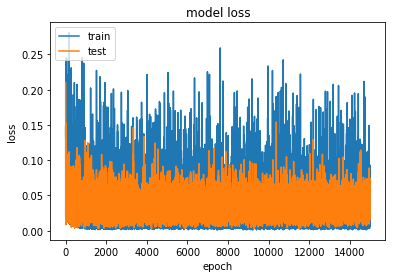

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()